In [1]:
#Work based on 
# Market share dynamics using Lotka–Volterra models
# Determining firms' utility functions and competitive roles from data on market shares using Lotka–Volterra models


#for arima analysis see GroceryMarketshare.ipynb

In [2]:
from datetime import datetime
from datetime import date
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
import matplotlib as mpl
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
#cParams['figure.figsize'] = 30, 615
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import itertools
import warnings
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import squarify
from scipy.optimize import curve_fit
# importing functools for reduce() 
import functools 
from numpy.polynomial import Polynomial as P

from sklearn import linear_model
import math
from scipy.integrate import odeint

In [3]:
onlinedf=pd.read_csv(r'D:\\retail\glvmodel16.csv')
onlinedf.set_index('time', inplace=True)
onlinedf['percentonline']=onlinedf['percentonline'].values/100
onlinedf['percentstore']=onlinedf['percentstore'].values/100
onlinedf

,percentonline,percentstore
time,,
2007,0.034,0.966
2008,0.049,0.951
2009,0.062,0.938
2010,0.073,0.927
2011,0.083,0.917
2012,0.093,0.907
2013,0.104,0.896
2014,0.113,0.887
2015,0.125,0.875


In [4]:
#quardratic fit

def func(x, a, b, c):
     return a + b*x + c*x**2

In [5]:
#linear fit

#def func(x, a, b):
#     return a + b*x 

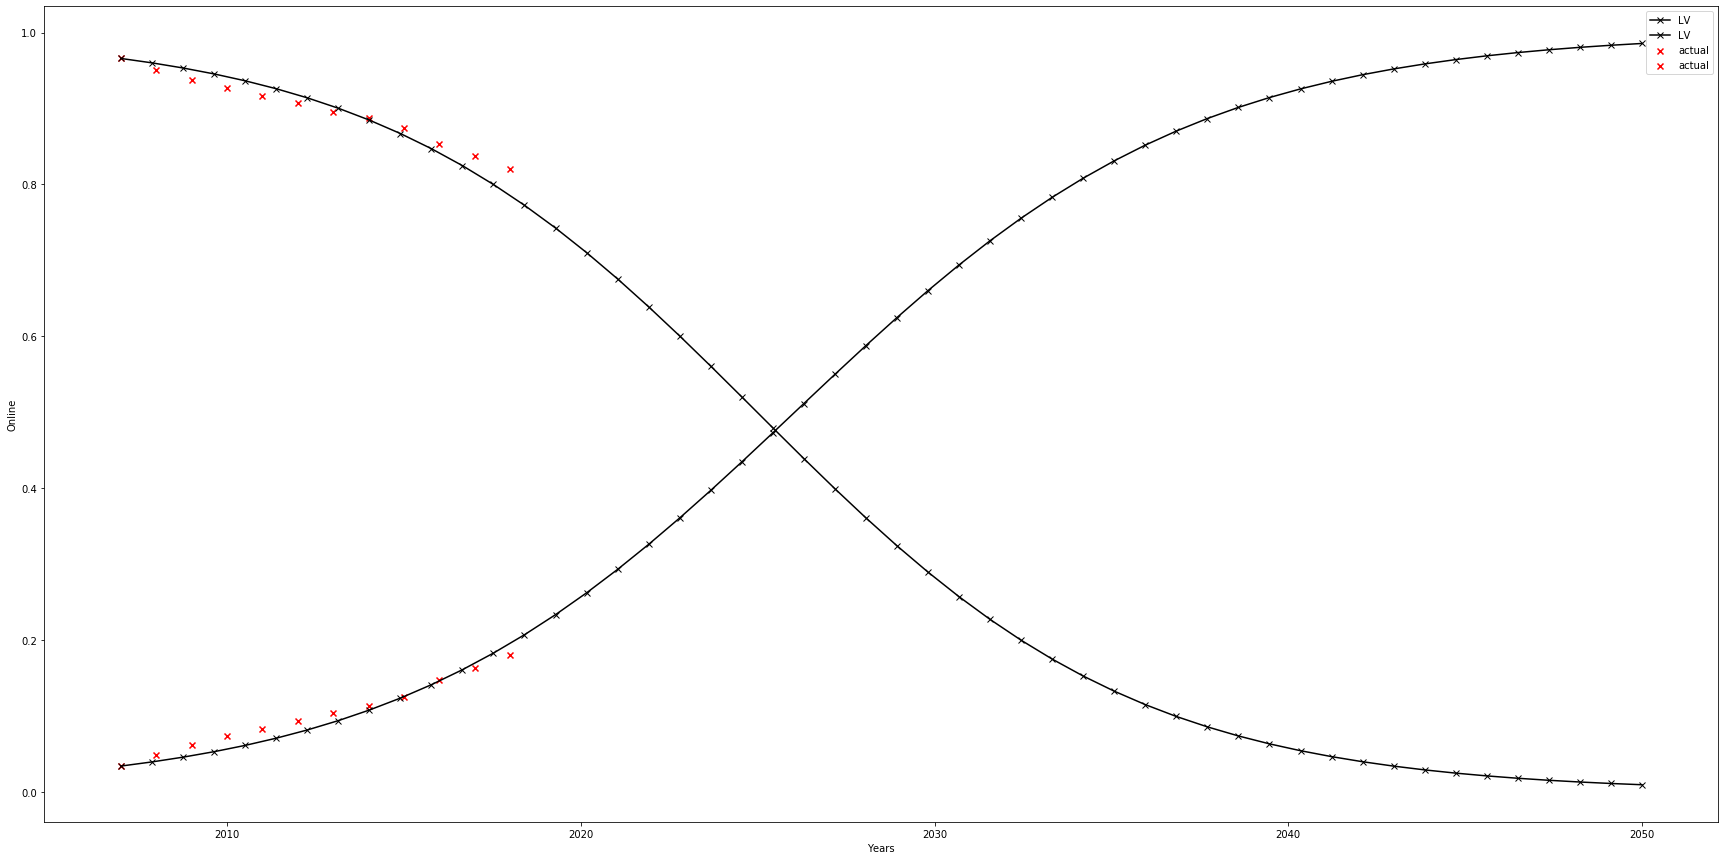

In [6]:
#Progress of Theoretical Physics, Yol. 96, No.1, July 1996
#Seasonal Isochronic Forcing of Lotka Volterra Equations
#John VANDERMEER 
#Include intraction between the retailer and customer via the interaction matrix A
# department store marketshare =81%
# online retailer market share = 11.4
# growth rate of department store share = -10%
# growth rate of online retailers = 4.1%

#see https://sites.duke.edu/djepapers/files/2016/08/jones.pdf
#https://ir.debenhams.com/static-files/0fd324ce-5cb4-4a35-8429-11ac949bf908
#https://ir.debenhams.com/sites/g/files/knoqqb38816/themes/site/nir_pid1372/IAR/assets/downloads/Financial%20Statements.pdf
#dP/dt=aNP-mP
#dN/dt= r[(1 +sinwt)/2]N - bN2- eNP

#Rise of online

#LVequations

k=[1.0,1.0]# carrying capacity
r=[-0.181, 0.181]# r is inherent per-capita growth rate
P0=[0.966, 0.034]#initial value of population 1 and population 2 at t=0
A=np.matrix([[-0.03,0.00],[0.0,0.030]])#interaction matrix

def dP_dt(P,t):
    return [r[0]*P[0]*(1 - P[0]-A[0,0]*P[1]/k[0]), r[1]*P[1]*(1-P[1]-A[1,1]*P[0]/k[1])]

#ts = np.linspace(0, 100, 100)
ts= np.linspace(2007, 2050, 50)
Ps = odeint(dP_dt, P0, ts)
LVdf=pd.DataFrame()

LVdf['instore'] = Ps[:,0]
LVdf['online'] = Ps[:,1]






plt.figure(figsize=(30,15))


#Measured values
y1=onlinedf['percentonline'].values
x1=np.linspace(2007, 2018, 12)
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

y2=onlinedf['percentstore'].values
x2=np.linspace(2007, 2018, 12)
plt.scatter(x2,y2, label='actual', marker ='x', color='r')

#Predicted values
y3=LVdf['online'].values
x3=np.linspace(2007, 2050, 50)
plt.plot(x3,y3, label='LV', marker ='x', color='black')


y4=LVdf['instore'].values
x4=np.linspace(2007, 2050, 50)
plt.plot(x4,y4, label='LV', marker ='x', color='black')


#Plotting

plt.xlabel("Years")
plt.ylabel("Online")
plt.legend()

MAPE= 10.864324790419206 %
MSE= 0.0015265801236295307
RMSE= 0.03907147455151303


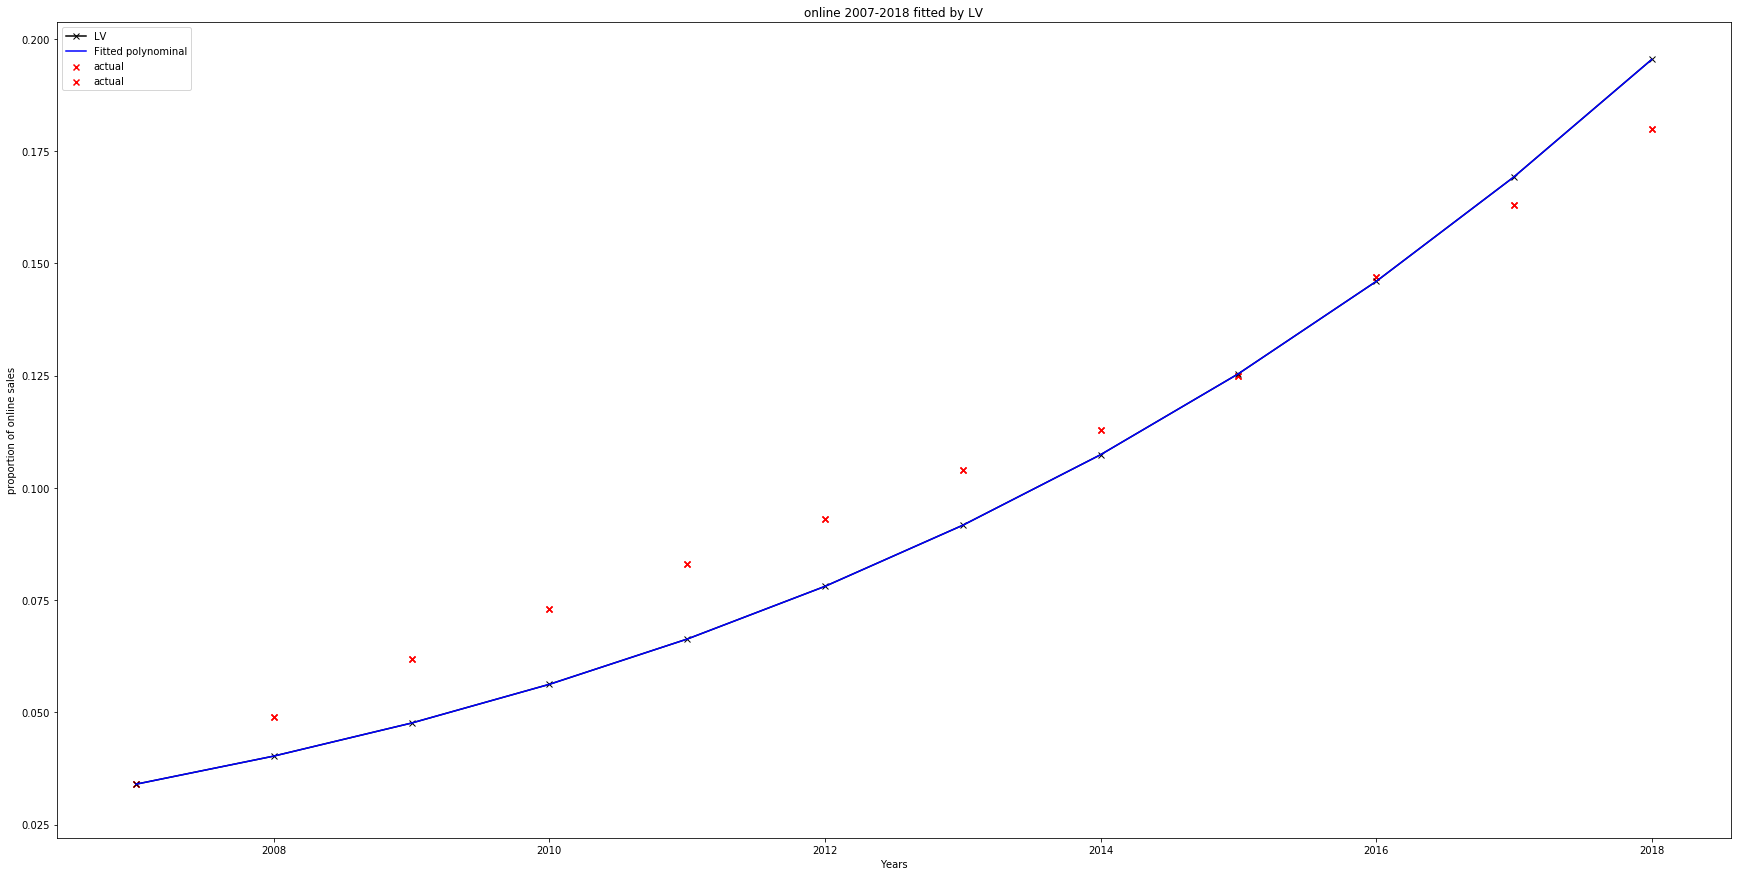

In [7]:
#LVequations

k=[1.0,1.0]# carrying capacity
r=[-0.181, 0.181]# r is inherent per-capita growth rate
P0=[0.966, 0.034]#initial value of population 1 and population 2 at t=0
A=np.matrix([[-0.03,0.00],[0.0,0.030]])#interaction matrix

def dP_dt(P,t):
    return [r[0]*P[0]*(1 - P[0]-A[0,0]*P[1]/k[0]), r[1]*P[1]*(1-P[1]-A[1,1]*P[0]/k[1])]

#ts = np.linspace(0, 100, 100)
ts= np.linspace(2007, 2018, 12)
Ps = odeint(dP_dt, P0, ts)
LVdf=pd.DataFrame()

LVdf['instore'] = Ps[:,0]
LVdf['online'] = Ps[:,1]






plt.figure(figsize=(30,15))


#Measured values
y1=onlinedf['percentonline'].values
x1=np.linspace(2007, 2018, 12)
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

#y2=onlinedf['percentstore'].values
#x2=np.linspace(2007, 2018, 12)
#plt.scatter(x2,y2, label='actual', marker ='x', color='r')

#Predicted values
y=LVdf['online'].values
x=np.linspace(2007, 2018, 12)
plt.plot(x,y, label='LV', marker ='x', color='black')


#y4=LVdf['instore'].values
#x4=np.linspace(2007, 2050, 50)
#plt.plot(x4,y4, label='LV', marker ='x', color='black')


#Plotting

plt.xlabel("Years")
plt.ylabel("Online")
plt.legend()

#metrics

MAPE=abs((onlinedf['percentonline'] - y)/onlinedf['percentonline']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by LV')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x1,y1, label='actual', marker = 'x', color='r')
plt.legend()

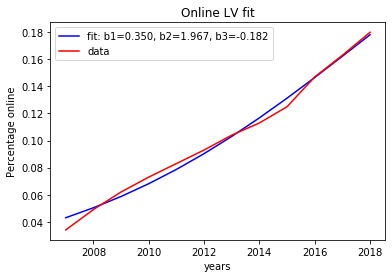

array([ 0.35038837,  1.9673993 , -0.18194785])

In [8]:
#P=kPo/(Po + (k-Po)exp(-rt))

#LV population growth
# K is the "Carrying Capacity"

def func(x,K,a, b):
    return K / (1+np.exp(a+b*(x-2007)))

ydata=onlinedf['percentonline'].values
xdata= np.linspace(2007, 2018, 12)
poptLV, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptLV), 'b-',label='fit: b1=%5.3f, b2=%5.3f, b3=%5.3f' % tuple(poptLV))
plt.plot(xdata, ydata, 'r-', label='data')
plt.title('Online LV fit')
plt.xlabel('years')
plt.ylabel('Percentage online')
plt.legend()
plt.show()
poptLV



MAPE= 5.0269517547281515 %
MSE= 0.00020213208476963952
RMSE= 0.01421731637017477


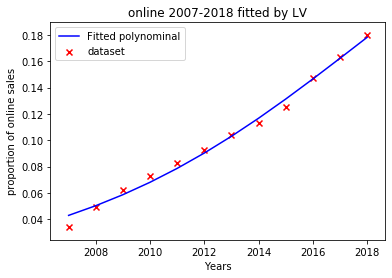

In [9]:
y= func(xdata, *poptLV)
x=xdata
y1=onlinedf['percentonline'].values

MAPE=abs((onlinedf['percentonline'] - y)/onlinedf['percentonline']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by LV')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x,y1, label='dataset', marker = 'x', color='r')
plt.legend()


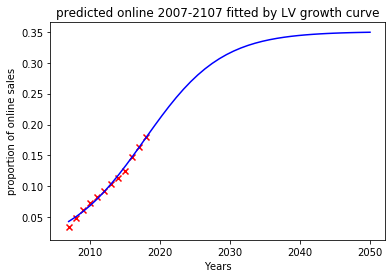

In [10]:
xdata = np.linspace(2007, 2050, 43)
x1data = np.linspace(2007, 2018, 12)
y= func(xdata, *poptLV)
x=xdata
x1=x1data
y1=onlinedf['percentonline'].values
plt.title('predicted online 2007-2107 fitted by LV growth curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')
plt.plot(x,y, label='predicted', color='b')
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

In [11]:
#The competitive roles are deduced from the signs of dij and dji.
#    Type of interaction
# + + Pure competition
# – + Predator–prey
# – – Mutualism
# – 0 Commensalism
# + 0 Amensalism
# 0 0 Neutralism

In [12]:
#Effect of online shoppinging

In [13]:
def func(x, a, b, c):
     return a + b*x + c*x**2

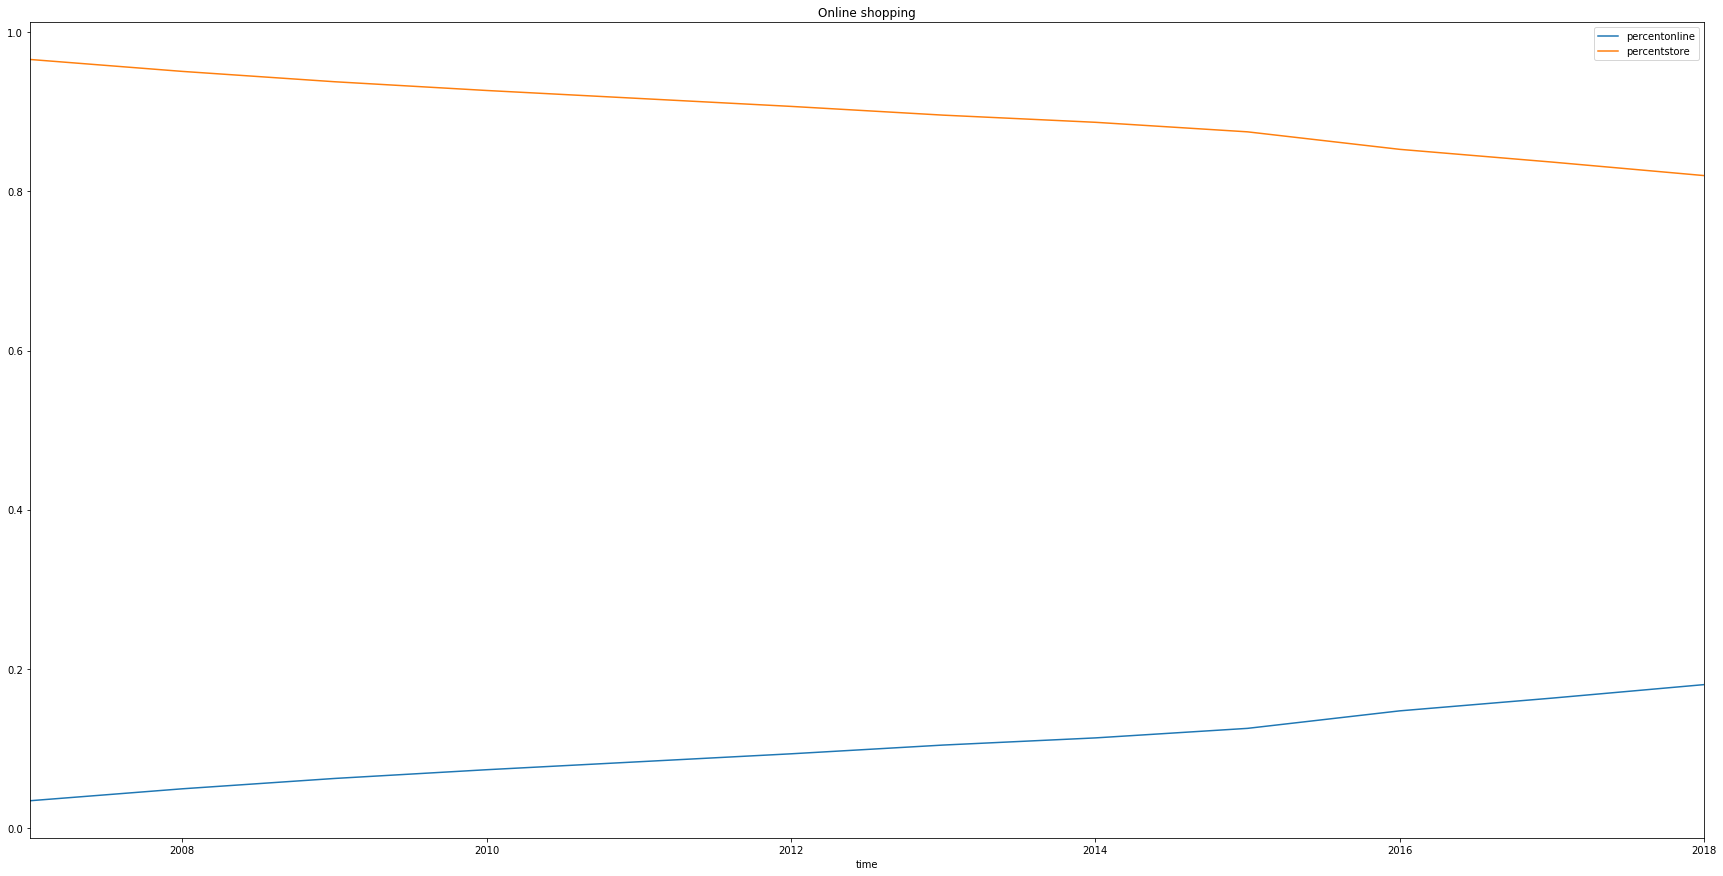

In [14]:
onlinedf.plot(figsize=(30,15), title='Online shopping')

In [15]:
onlinesum=onlinedf.sum(axis = 1, skipna = True)
onlinesum.head()

time
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
dtype: float64

In [16]:
logonline=np.log(onlinedf)
logonline.head()

,percentonline,percentstore
time,,
2007,-3.381395,-0.034591
2008,-3.015935,-0.050241
2009,-2.780621,-0.064005
2010,-2.617296,-0.075802
2011,-2.488915,-0.086648


In [17]:
outergood=1-onlinesum
outergood.head()

time
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
dtype: float64

In [18]:
#logouter=np.log(outergood)
#logouter.head()

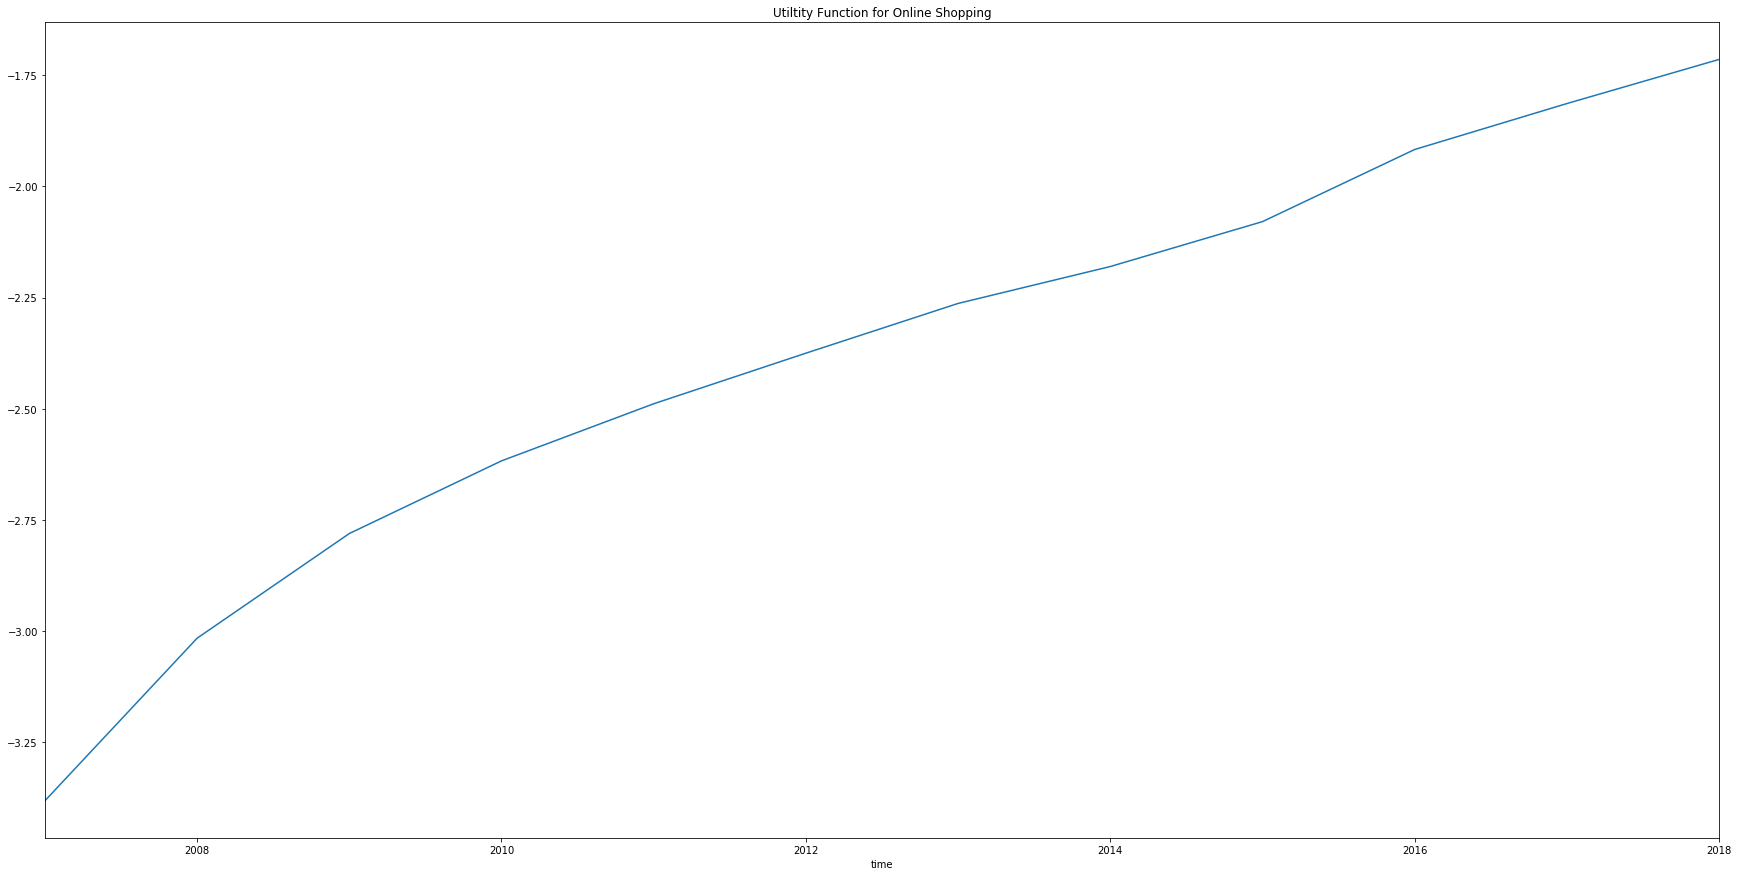

In [19]:
onlineutility=logonline['percentonline']
onlineutility.plot(figsize=(30,15), title='Utiltity Function for Online Shopping')

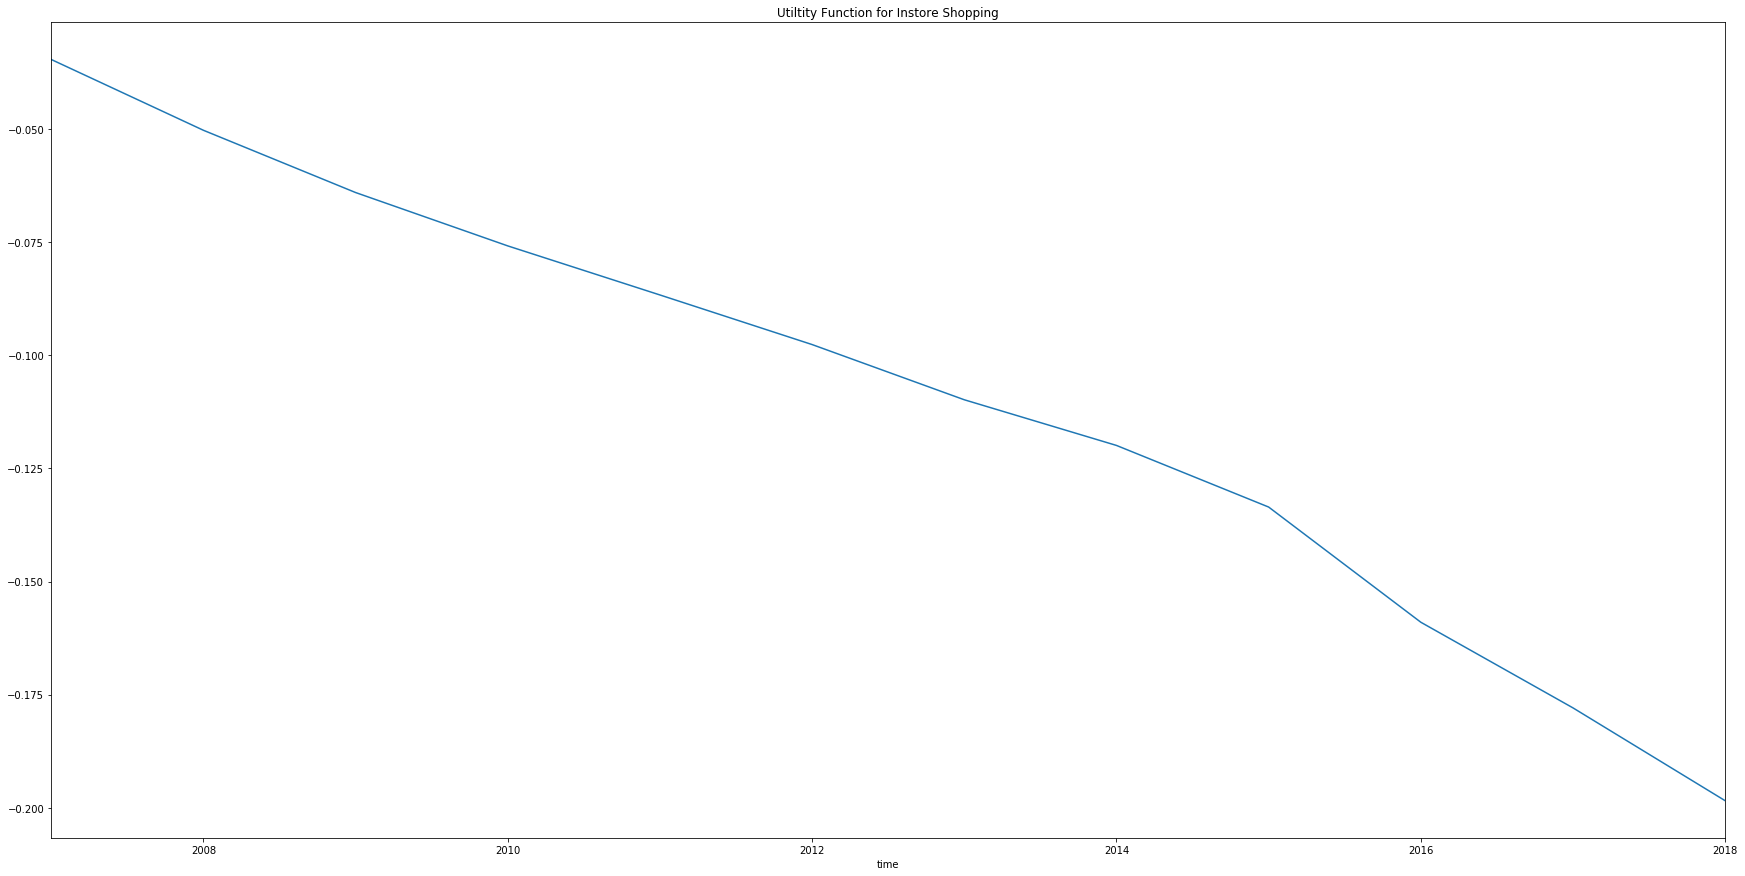

In [20]:
instoreutility=logonline['percentstore']
instoreutility.plot(figsize=(30,15), title='Utiltity Function for Instore Shopping')

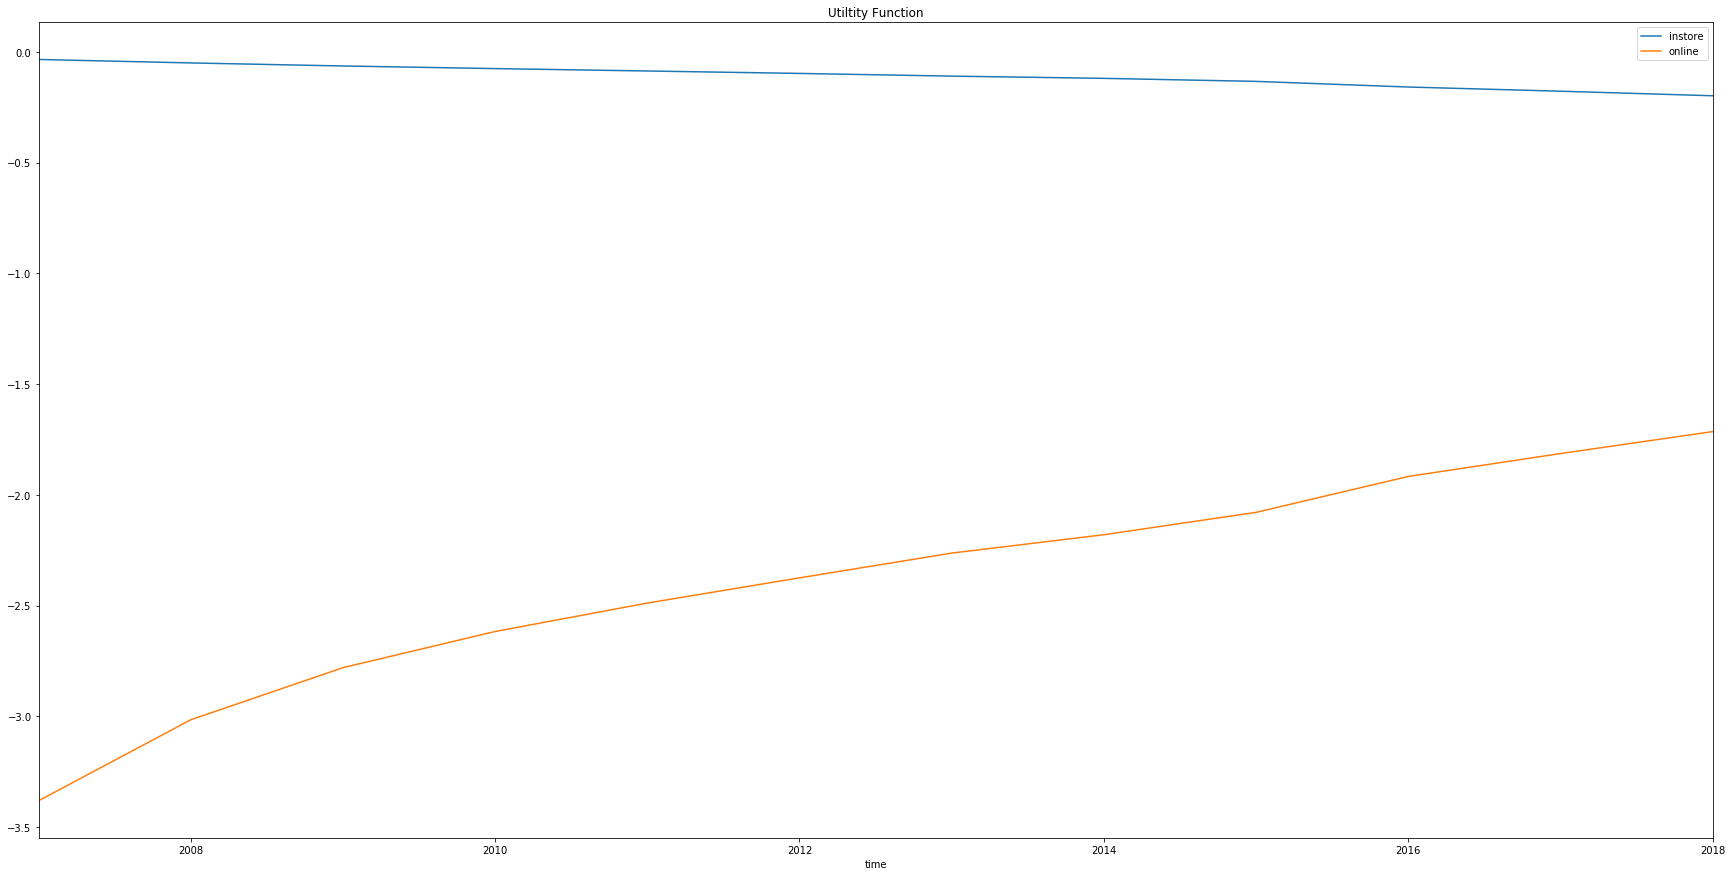

In [21]:
utilityonlinedf=pd.DataFrame()
utilityonlinedf['instore']=instoreutility
utilityonlinedf['online']=onlineutility
utilityonlinedf.plot(figsize=(30,15), title='Utiltity Function')

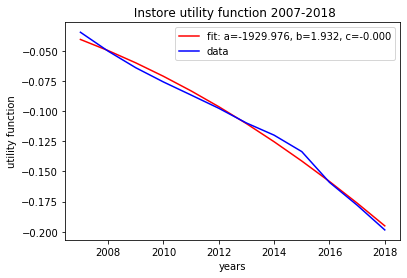

In [22]:
ydata=instoreutility
xdata = np.linspace(2007, 2018, 12)
poptinstore, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptinstore), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(poptinstore))
plt.plot(xdata, ydata, 'b-', label='data')
plt.title(' Instore utility function 2007-2018')
plt.xlabel('years')
plt.ylabel('utility function')
plt.legend()
plt.show()


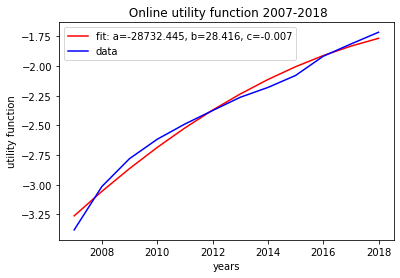

In [23]:
ydata=onlineutility
xdata = np.linspace(2007, 2018, 12)
poptonline, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptonline), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(poptonline))
plt.plot(xdata, ydata, 'b-', label='data')
plt.title(' Online utility function 2007-2018')
plt.xlabel('years')
plt.ylabel('utility function')
plt.legend()
plt.show()

In [24]:
eonline=[]
Gonline=[]
einstore=[]
Ginstore=[]

eouter=[]
esum=[]

for i in xdata:
    poly1=np.exp(poptinstore[0] + poptinstore[1]*i +poptinstore[2]*(i**2));einstore.append(poly1)
    Dinstore= (poptinstore[1] + 2*poptinstore[2]*(i));Ginstore.append(Dinstore)
    poly2=np.exp(poptonline[0] + poptonline[1]*i +poptonline[2]*(i**2));eonline.append(poly2)
    Donline= (poptonline[1] +2*poptonline[2]*(i));Gonline.append(Donline)
   
    
    
    poly10=poly1+poly2;esum.append(poly10)









esum

[0.9985156085911124,
 0.9984823371373286,
 0.9988219712666151,
 0.9995086960608848,
 1.0004551982293988,
 1.0015072770826572,
 1.0024426741070198,
 1.0029749632182476,
 1.002762955678113,
 1.0014255694317877,
 0.9985615416878953,
 0.9937727921095882]

MAPE= 0.4623478865269326 %
MSE= 0.0002943107194788778
RMSE= 0.017155486570741087


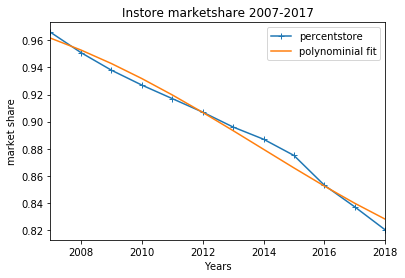

In [25]:
x=xdata
y = [b/m for b,m in zip(einstore, esum)]
onlinedf['percentstore'].plot(marker='+')
plt.plot(x,y, label ='polynominial fit')


MAPE=abs((onlinedf['percentstore'] - y)/onlinedf['percentstore']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentstore'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('Instore marketshare 2007-2017')
plt.xlabel('Years')
plt.ylabel('market share')


#deptsharedf['John Lewis'].plot(marker='o')
#plt.plot(x,y, label='Fitted polynominal')
plt.legend()

MAPE= 4.793660291720505 %
MSE= 0.0002943107194788768
RMSE= 0.01715548657074106


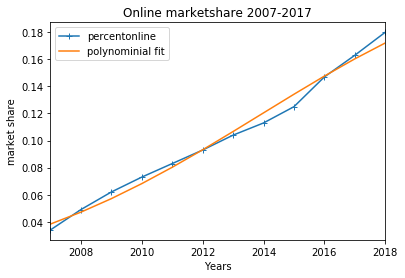

In [26]:
x=xdata
y = [b/m for b,m in zip(eonline, esum)]
onlinedf['percentonline'].plot(marker='+')
plt.plot(x,y, label ='polynominial fit')


MAPE=abs((onlinedf['percentonline'] - y)/onlinedf['percentonline']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('Online marketshare 2007-2017')
plt.xlabel('Years')
plt.ylabel('market share')


#deptsharedf['John Lewis'].plot(marker='o')
#plt.plot(x,y, label='Fitted polynominal')
plt.legend()

In [27]:
Gdf=pd.DataFrame()
Gdf['percentstore']=Ginstore
Gdf['percentonline']=Gonline

Gdf['time']=onlinedf.index
Gdf.set_index('time',drop=True, inplace=True)
Gdf

,percentstore,percentonline
time,,
2007,-0.008728,0.213369
2008,-0.009695,0.199317
2009,-0.010662,0.185265
2010,-0.011629,0.171213
2011,-0.012596,0.157161
2012,-0.013563,0.143109
2013,-0.014530,0.129057
2014,-0.015497,0.115005
2015,-0.016464,0.100953


Text(0, 0.5, 'G')

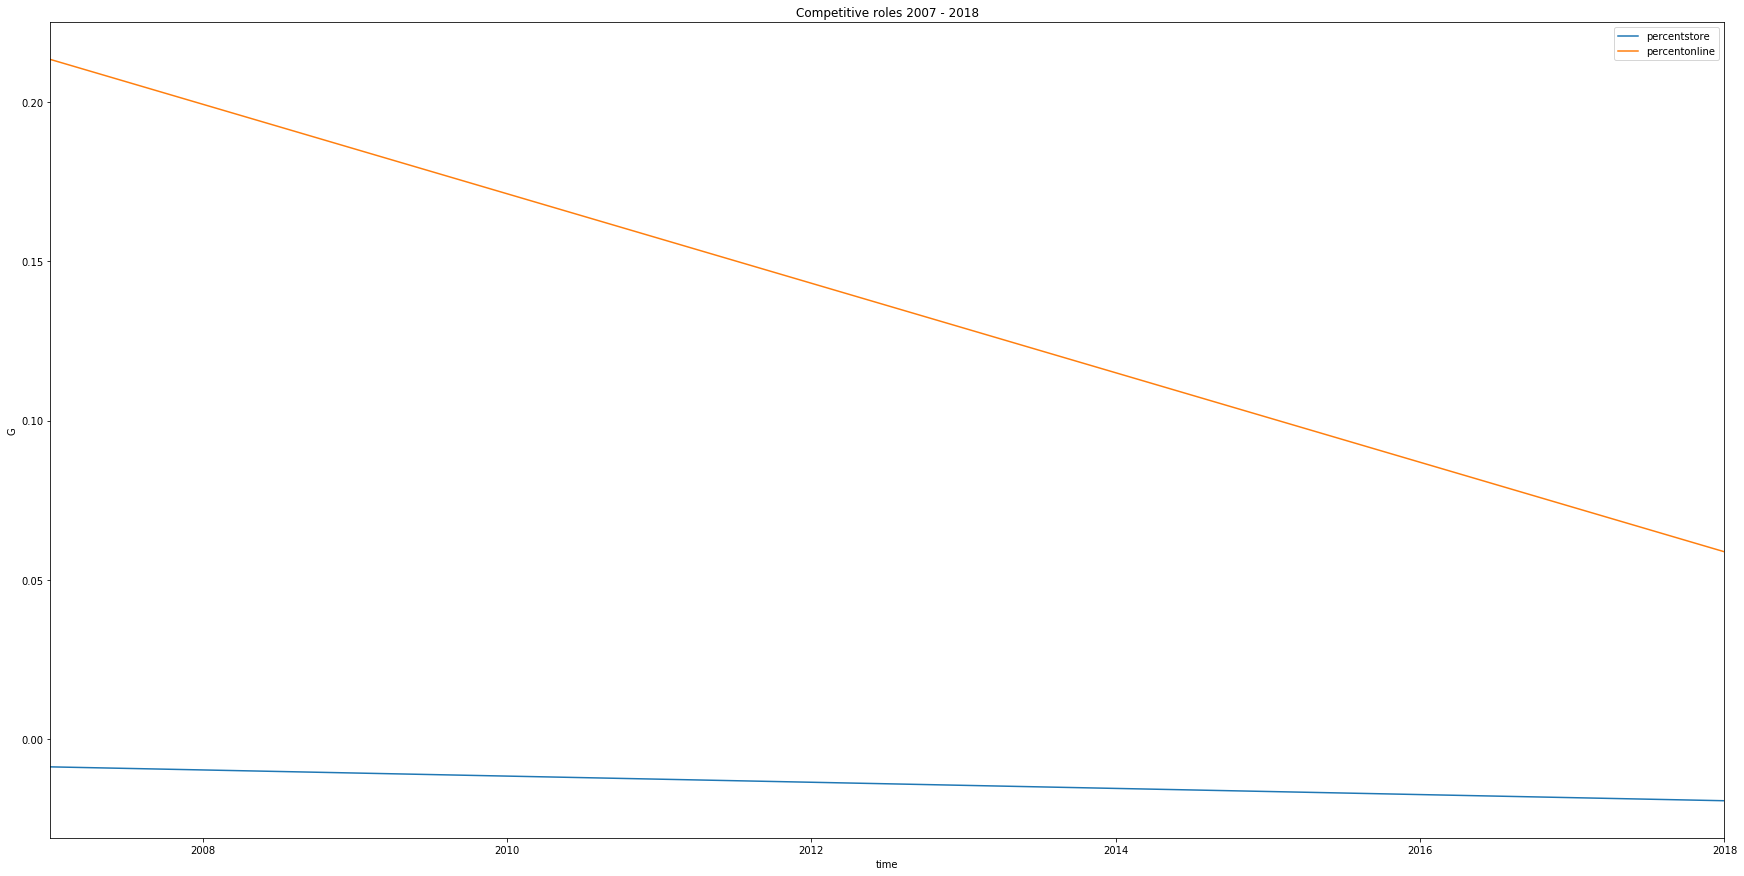

In [28]:
Gdf.plot(figsize=(30,15), title='Competitive roles 2007 - 2018')
plt.ylabel('G')

In [29]:
#numpy.sign(data)
#construct interaction matrix

instoresign=np.sign(poptinstore[2])
onlinesign=np.sign(poptonline[2])


interaction=np.zeros(2)
interaction[0]=instoresign
interaction[1]=onlinesign


x = np.array(interaction)
y = np.array(interaction)


community_matrix=np.array([[x0, y0] for x0 in x for y0 in y])
community_matrix=[sum(tup) for tup in community_matrix]
community_matrix=np.reshape(community_matrix, (2,2)).T
community_matrix

array([[-2., -2.],
       [-2., -2.]])

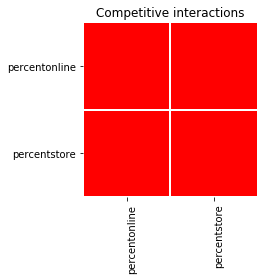

In [30]:
stores=list(onlinedf)

fig, ax = plt.subplots()
cmap = mpl.colors.ListedColormap(['r', 'b', 'g'])
im = ax.imshow(community_matrix, cmap=cmap)

# We want to show all ticks...
ax.set_xticks(np.arange(len(stores)))
ax.set_yticks(np.arange(len(stores)))
# ... and label them with the respective list entries
ax.set_xticklabels(stores)
ax.set_yticklabels(stores)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

#Loop over data dimensions and create text annotations.
#for i in range(len(stores)):
   # for j in range(len(stores)):
      #  text = ax.text(j, i, community_matrix[i, j],
                  #     ha="center", va="center", color="w")

ax.set_title("Competitive interactions")
fig.tight_layout()
# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
    ax.set_xticks(np.arange(community_matrix.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(community_matrix.shape[0]+1)-.5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2.0)
plt.show()


In [31]:


interaction1=np.zeros(2)
interaction1[0]=poptinstore[2]
interaction1[1]=poptonline[2]




community1 = np.outer(interaction1,interaction1).transpose()
community_matrix1=np.asmatrix(community1)

#plt.imshow(community_matrix, interpolation='nearest')
#plt.show()
community_matrix1

matrix([[2.33746088e-07, 3.39686637e-06],
        [3.39686637e-06, 4.93642537e-05]])

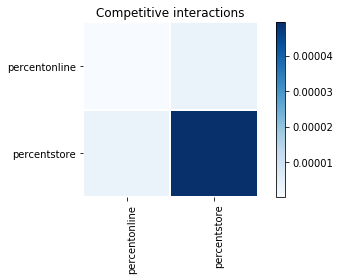

In [32]:
stores=list(onlinedf)

fig, ax = plt.subplots()
im  = ax.imshow(community_matrix1, cmap="Blues")
plt.colorbar(im)
# We want to show all ticks...
ax.set_xticks(np.arange(len(stores)))
ax.set_yticks(np.arange(len(stores)))
# ... and label them with the respective list entries
ax.set_xticklabels(stores)
ax.set_yticklabels(stores)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(stores)):
    #for j in range(len(stores)):
        #text = ax.text(j, i, community_matrix[i, j],
                       #ha="center", va="center", color="w")

ax.set_title("Competitive interactions")
fig.tight_layout()
# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
    ax.set_xticks(np.arange(community_matrix.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(community_matrix.shape[0]+1)-.5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2.0)
plt.show()

In [33]:
#

forecastdata = np.linspace(2007, 2050, 50)

eonline=[]
Gonline=[]
einstore=[]
Ginstore=[]

eouter=[]
esum=[]

for i in forecastdata:
    poly1=np.exp(poptinstore[0] + poptinstore[1]*i +poptinstore[2]*(i**2));einstore.append(poly1)
    Dinstore= (poptinstore[1] + 2*poptinstore[2]*(i));Ginstore.append(Dinstore)
    poly2=np.exp(poptonline[0] + poptonline[1]*i +poptonline[2]*(i**2));eonline.append(poly2)
    Donline= (poptonline[1] +2*poptonline[2]*(i));Gonline.append(Donline)
   
    
    
    poly10=poly1+poly2;esum.append(poly10)




In [34]:
x=forecastdata
yonline = [b/m for b,m in zip(eonline, esum)]
yinstore = [b/m for b,m in zip(einstore, esum)]

In [35]:
forecastdf=pd.DataFrame()
forecastdf['instore']=yinstore
forecastdf['online']=yonline

In [36]:
forecastdf['time']=forecastdata
forecastdf.set_index('time',drop=True, inplace=True)

forecastdf.head()

,instore,online
time,,
2007.000000,0.961669,0.038331
2007.877551,0.954023,0.045977
2008.755102,0.945461,0.054539
2009.632653,0.936019,0.063981
2010.510204,0.925768,0.074232


Text(0, 0.5, 'market share')

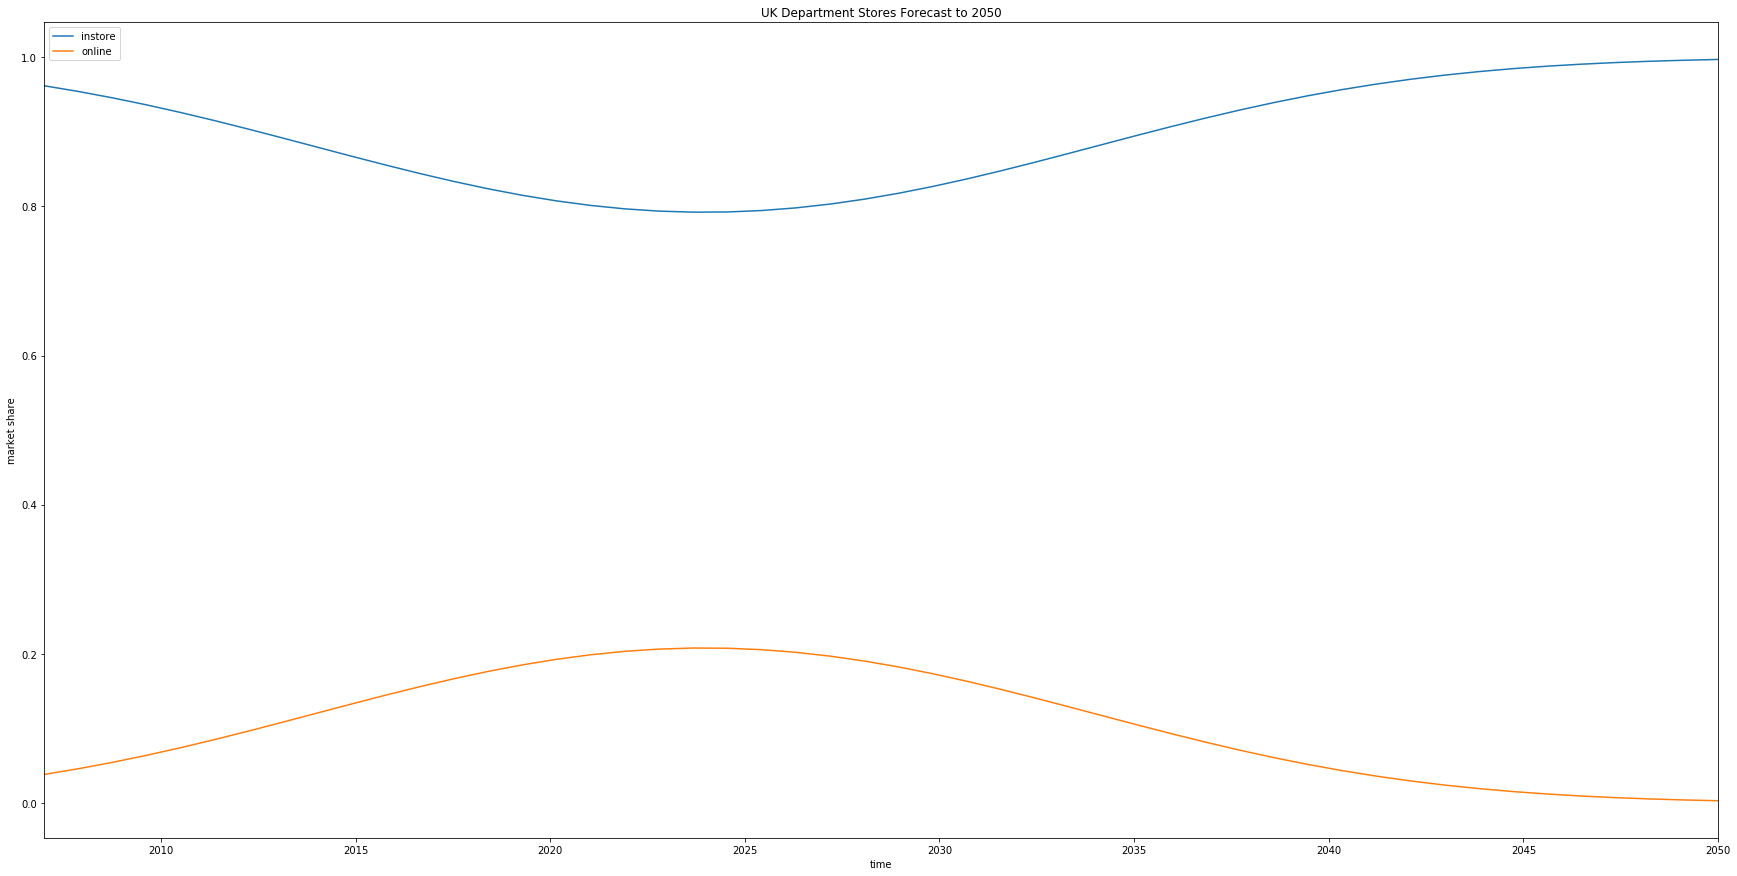

In [37]:
forecastdf.plot(figsize=(30,15), title='UK Department Stores Forecast to 2050')
plt.ylabel('market share')

In [38]:
#ARIMA analysis

In [39]:
#################################
### category sales  ###
#################################

colnames=['category','online','store','onlinepercent','storepercent','pubcategory','retailingpercent']
glv5df=pd.read_csv(r'D:\\retail\glvmodelcsv5.csv', names =colnames)
glv5df.head()

,category,online,store,onlinepercent,storepercent,pubcategory,retailingpercent
0,Food,8358.5,149704.3,5.288088,94.711912,Predominantly food stores,38.5
1,Non-food,20894.9,148040.6,12.368567,87.631433,Predominantly non-food stores,41.0
2,Department stores,4862.1,29940.5,13.970508,86.029492,Non-store retailing,10.3
3,Other non-food,4927.7,47363.3,9.423610,90.576390,Automotive Fuel,10.2
4,Textile clothing and footwear,7353.4,41249.3,15.129612,84.870388,NaN,NaN


<Figure size 2160x1080 with 0 Axes>

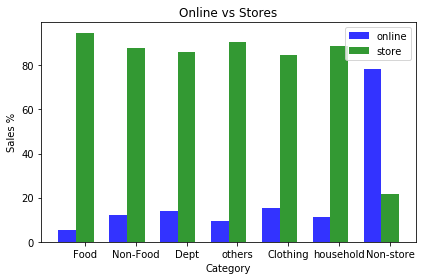

In [40]:

onlinesales = glv5df['onlinepercent']
instoresales= glv5df['storepercent']

plt.figure(figsize=(30,15))

n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, onlinesales, bar_width,
alpha=opacity,
color='b',
label='online')


rects2 = plt.bar(index + bar_width, instoresales, bar_width,
alpha=opacity,
color='g',
label='store')


plt.xlabel('Category')
plt.ylabel('Sales %')
plt.title('Online vs Stores')
plt.xticks(index + bar_width, ('Food', 'Non-Food', 'Dept', 'others', 'Clothing', 'household', 'Non-store'))
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 2160x1080 with 0 Axes>

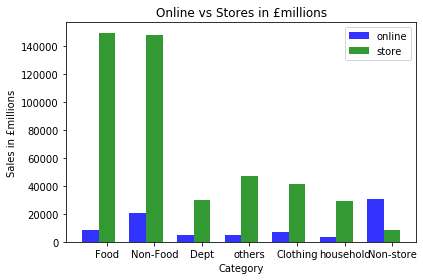

In [41]:

onlinesales = glv5df['online']
instoresales= glv5df['store']

plt.figure(figsize=(30,15))

n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, onlinesales, bar_width,
alpha=opacity,
color='b',
label='online')


rects2 = plt.bar(index + bar_width, instoresales, bar_width,
alpha=opacity,
color='g',
label='store')


plt.xlabel('Category')
plt.ylabel('Sales in £millions')
plt.title('Online vs Stores in £millions')
plt.xticks(index + bar_width, ('Food', 'Non-Food', 'Dept', 'others', 'Clothing', 'household', 'Non-store'))
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
#################################
### category sales store vs online 2018 ###
#################################
glv9df=pd.read_csv(r'D:\\retail\glvmodelcsv9.csv')
glv9df

,category,Online,Store,% online,%store
0,Food,8358.5,149704.3,5.288088,94.711912
1,Non-food,20894.9,148040.6,12.368567,87.631433
2,Department stores,4862.1,29940.5,13.970508,86.029492
3,Other non-food,4927.7,47363.3,9.423610,90.576390
4,Textile clothing and footwear,7353.4,41249.3,15.129612,84.870388
5,Household goods,3751.6,29487.5,11.286708,88.713292
6,Non-store,30581.6,8516.5,78.217612,21.782388


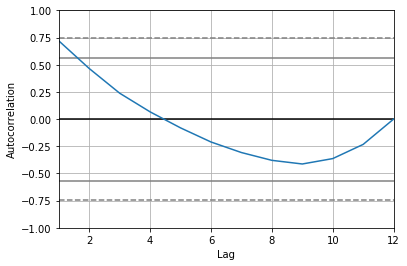

In [43]:
## Online marketshare  ##
glv16df=pd.read_csv(r'D:\\retail\glvmodel16.csv')
glv16df.set_index('time', inplace=True)
glv16df
riseofonline = glv16df['percentonline']
autocorrelation_plot(riseofonline)

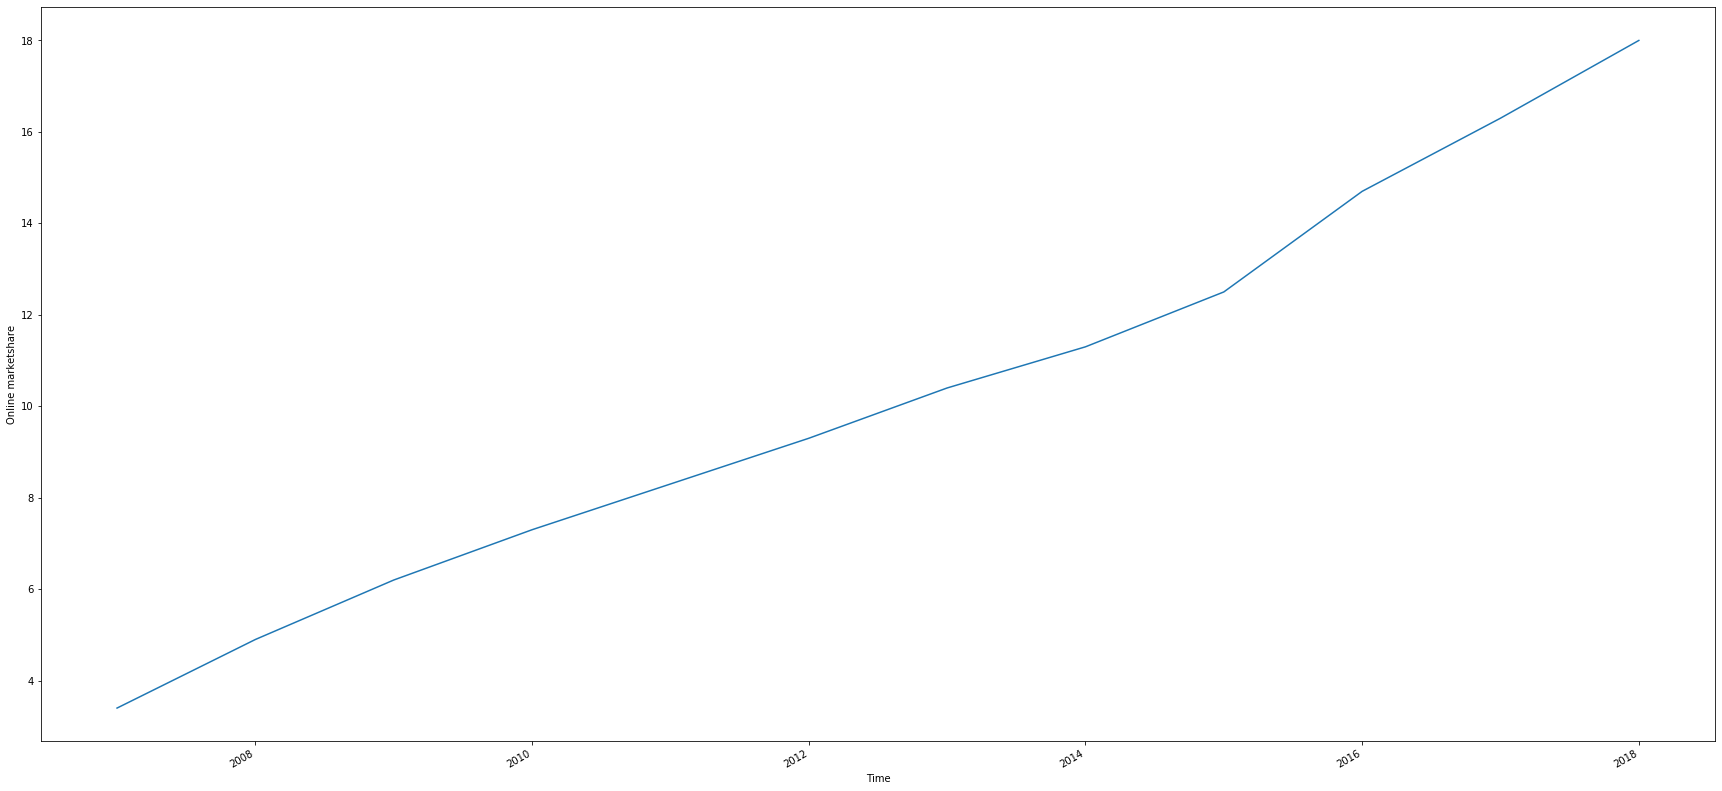

In [44]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Online marketshare')
fig.autofmt_xdate()
plt.plot(riseofonline) 

In [45]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=riseofonline.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                             ARIMA Model Results                              
Dep. Variable:        D.percentonline   No. Observations:                   11
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -3.613
Method:                       css-mle   S.D. of innovations              0.333
Date:                Wed, 14 Aug 2019   AIC                             13.226
Time:                        11:22:29   BIC                             14.420
Sample:                             1   HQIC                            12.474
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3607      0.169      8.041      0.000       1.029       1.692
ar.L1.D.percentonline     0.4341      0.269      1.617      0.140      -0.092       0.960
        

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


               0
count  11.000000
mean   -0.005499
std     0.349603
min    -0.347505
25%    -0.219210
50%    -0.121144
75%     0.089330
max     0.909085


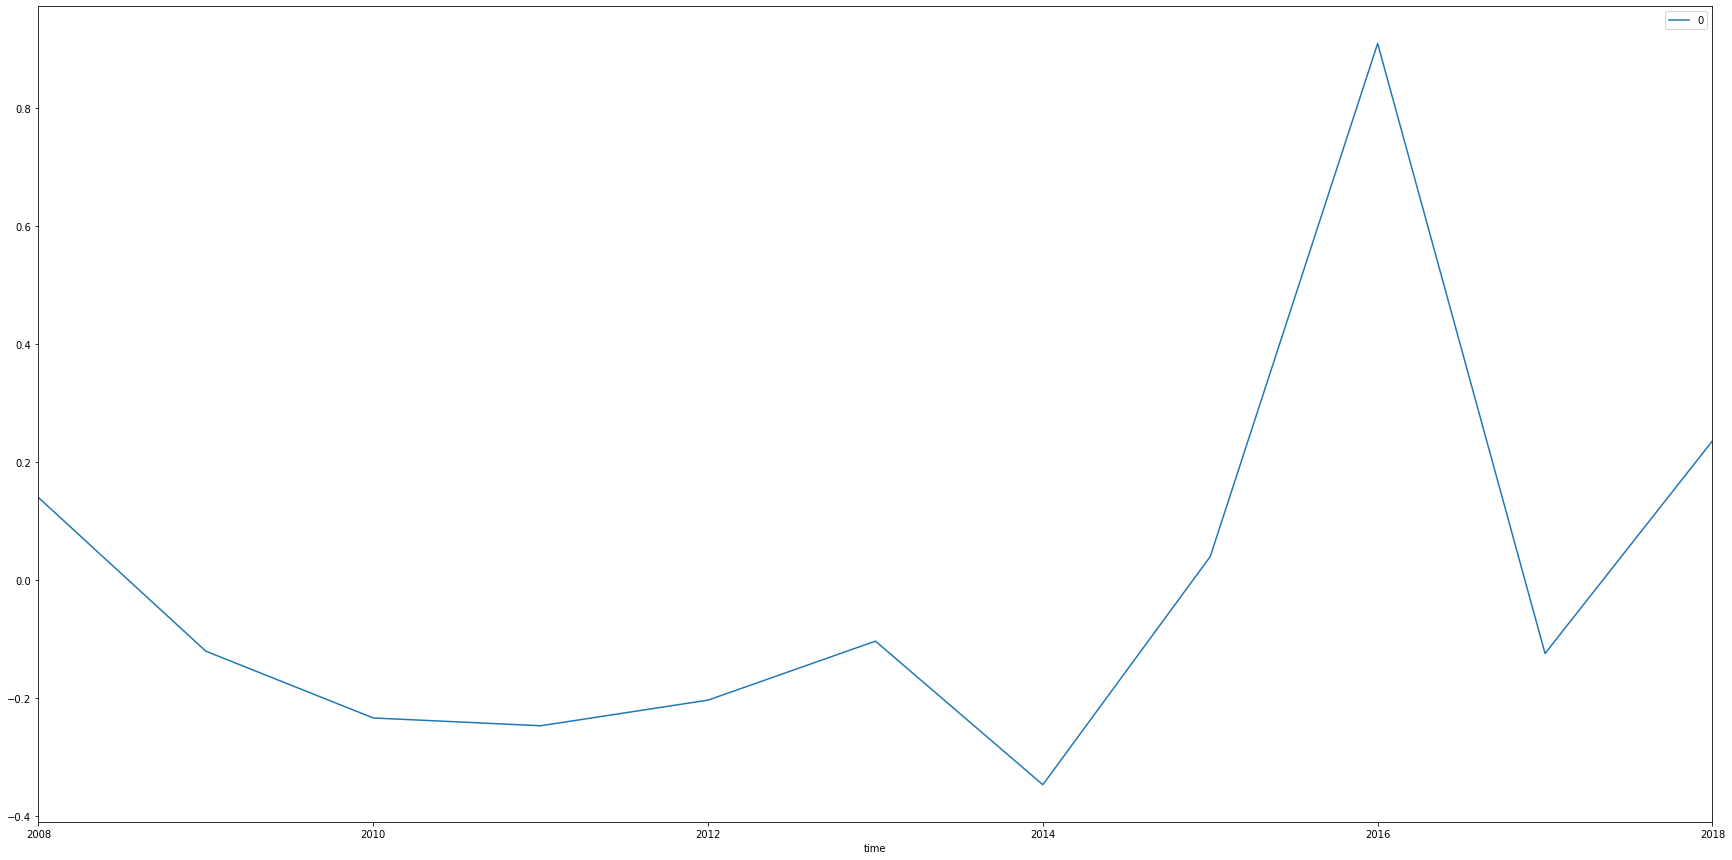

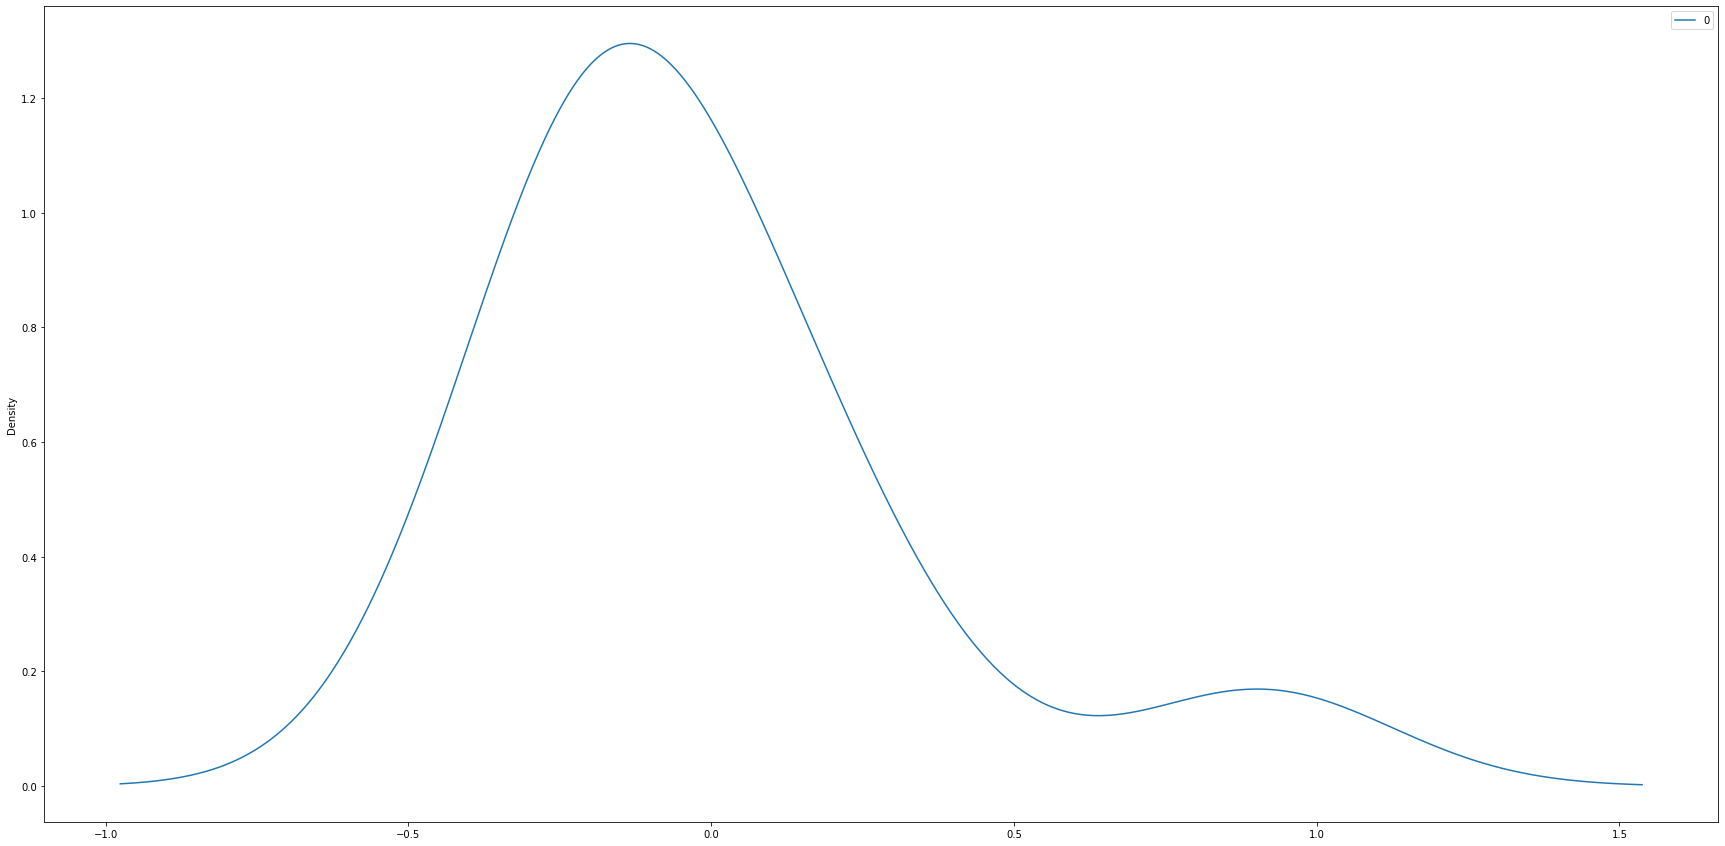

In [46]:
#ARIMA fit online marketshare
model = ARIMA(riseofonline, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())  


In [47]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
indexdf = pd.date_range(start='2007', periods=12, freq='A') 
indexdf=indexdf.to_period()


X=riseofonline
X.index = indexdf

In [49]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:87.05550868978047
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:71.90101815142448
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:36.61138119530295
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:26.74840878112562
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:19.03935856979445
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:13.9736786882142
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:13.97267908478944
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:14.885569982978984


In [50]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 73.38761710703048
ARIMA: (0, 0, 1) 64.85331104362322
ARIMA: (0, 1, 0) 13.458763444613261
ARIMA: (0, 1, 1) 13.498527725019521
ARIMA: (1, 0, 0) 65.07159965953048
ARIMA: (1, 1, 0) 13.225996522575084
ARIMA: (1, 1, 1) 15.216546703540086


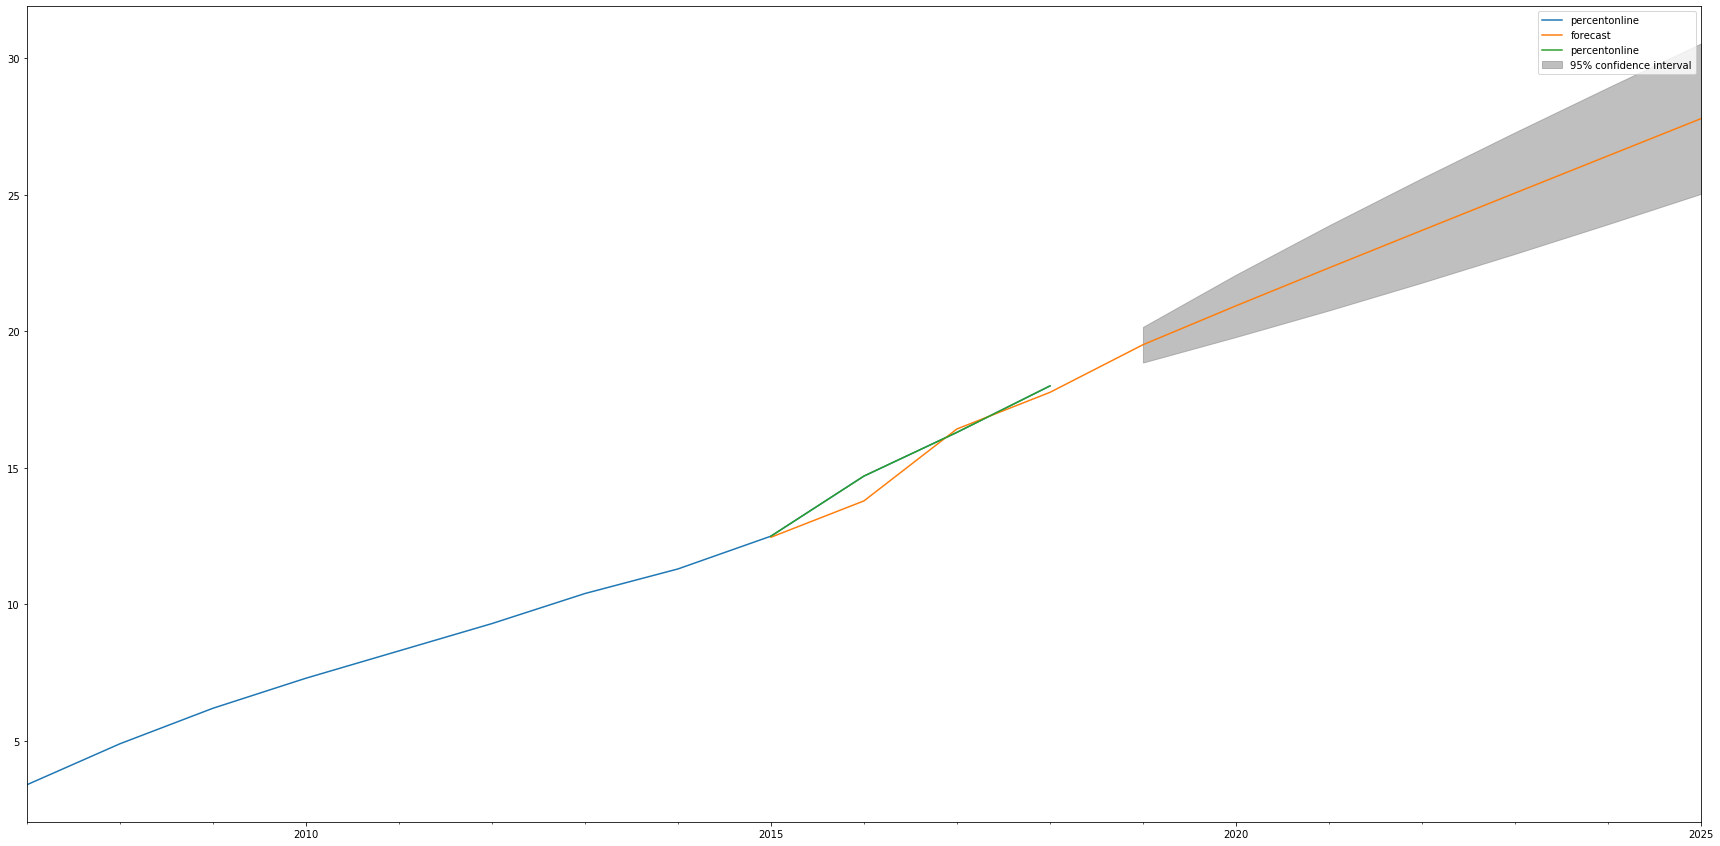

In [52]:
X=riseofonline
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (1, 1, 0)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2007':].plot(ax=ax)
fig = res.plot_predict('2015', '2025', dynamic=False, ax=ax, plot_insample=True)


plt.show()

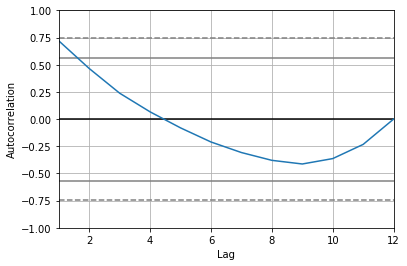

In [53]:
#Looking at instore


fallofinstore = glv16df['percentstore']
autocorrelation_plot(fallofinstore)

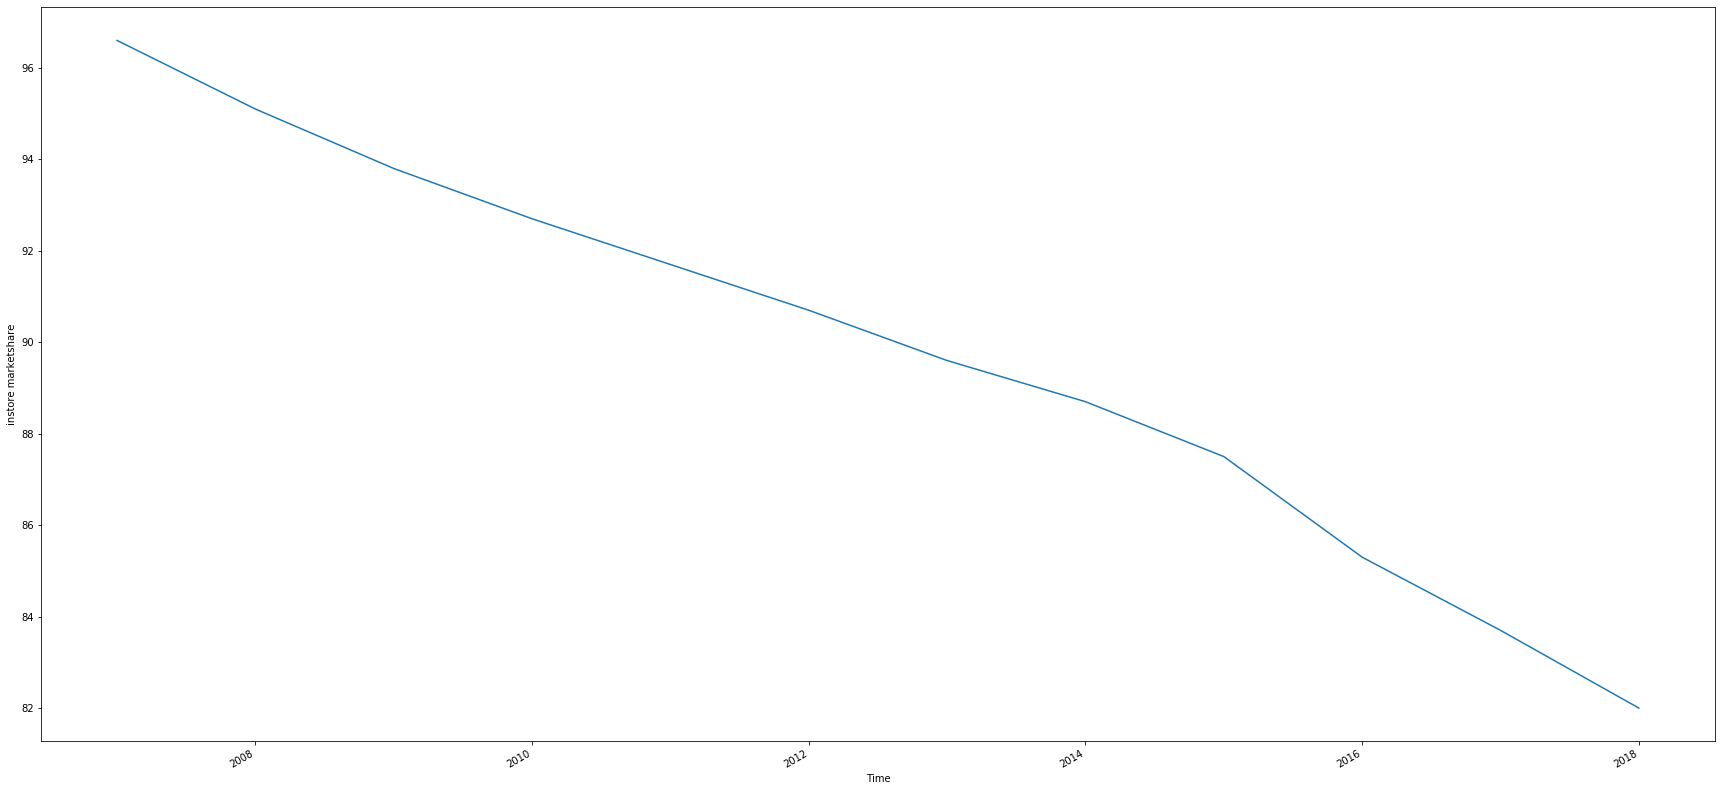

In [54]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('instore marketshare')
fig.autofmt_xdate()
plt.plot(fallofinstore) 

In [55]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()

#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=fallofinstore.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:         D.percentstore   No. Observations:                   11
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -3.613
Method:                       css-mle   S.D. of innovations              0.333
Date:                Wed, 14 Aug 2019   AIC                             13.226
Time:                        11:22:31   BIC                             14.420
Sample:                             1   HQIC                            12.474
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3607      0.169     -8.041      0.000      -1.692      -1.029
ar.L1.D.percentstore     0.4341      0.269      1.617      0.140      -0.092       0.960
            

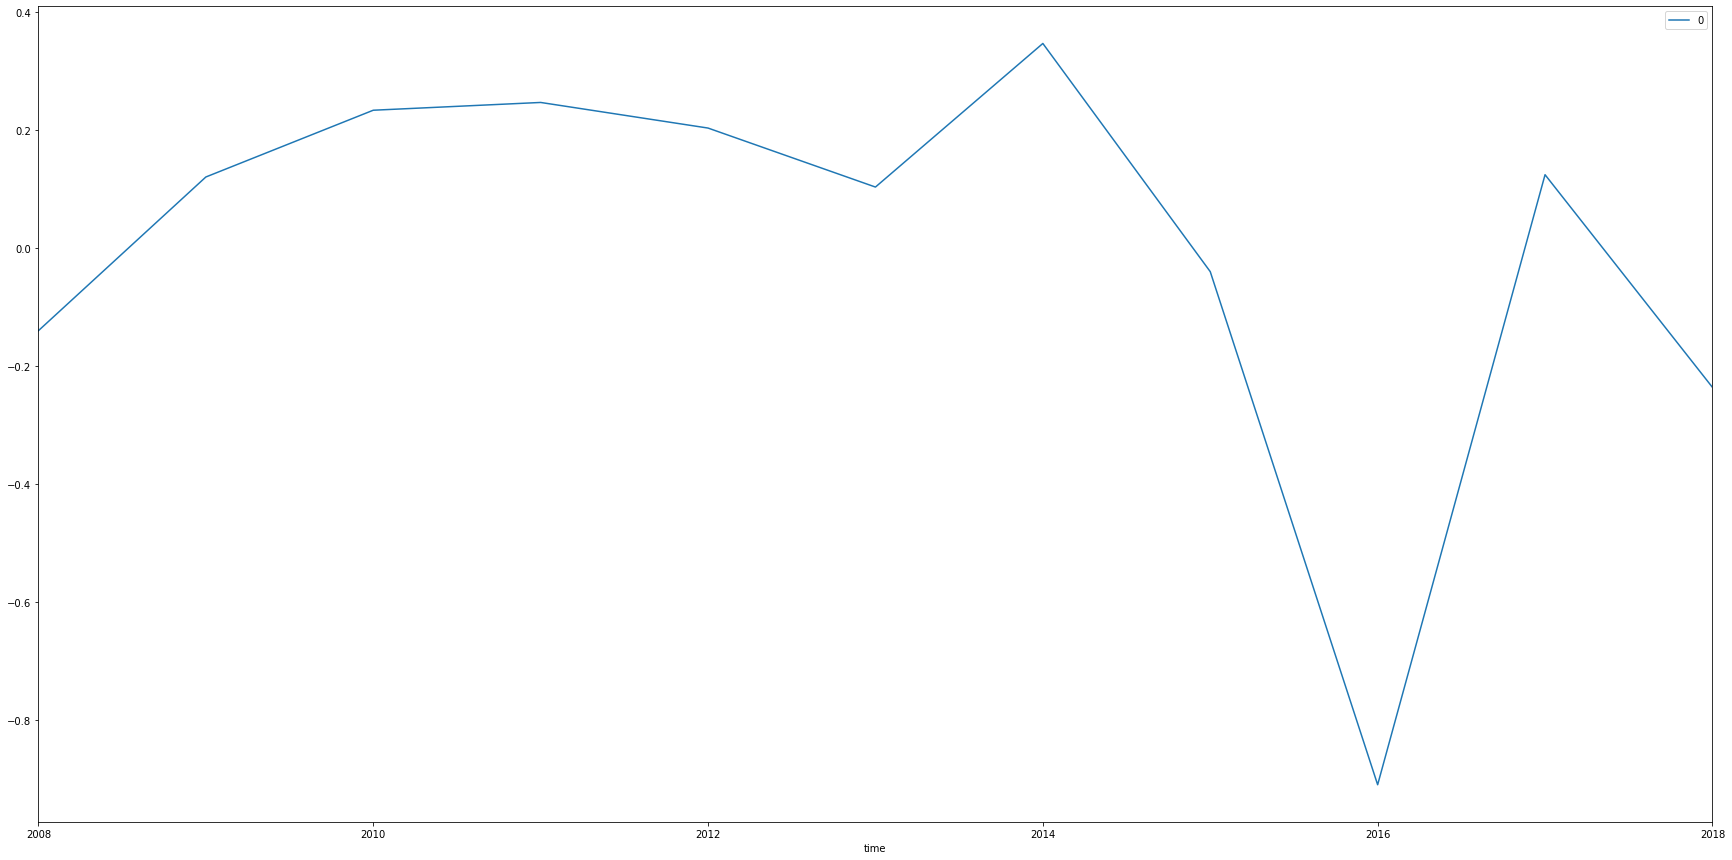

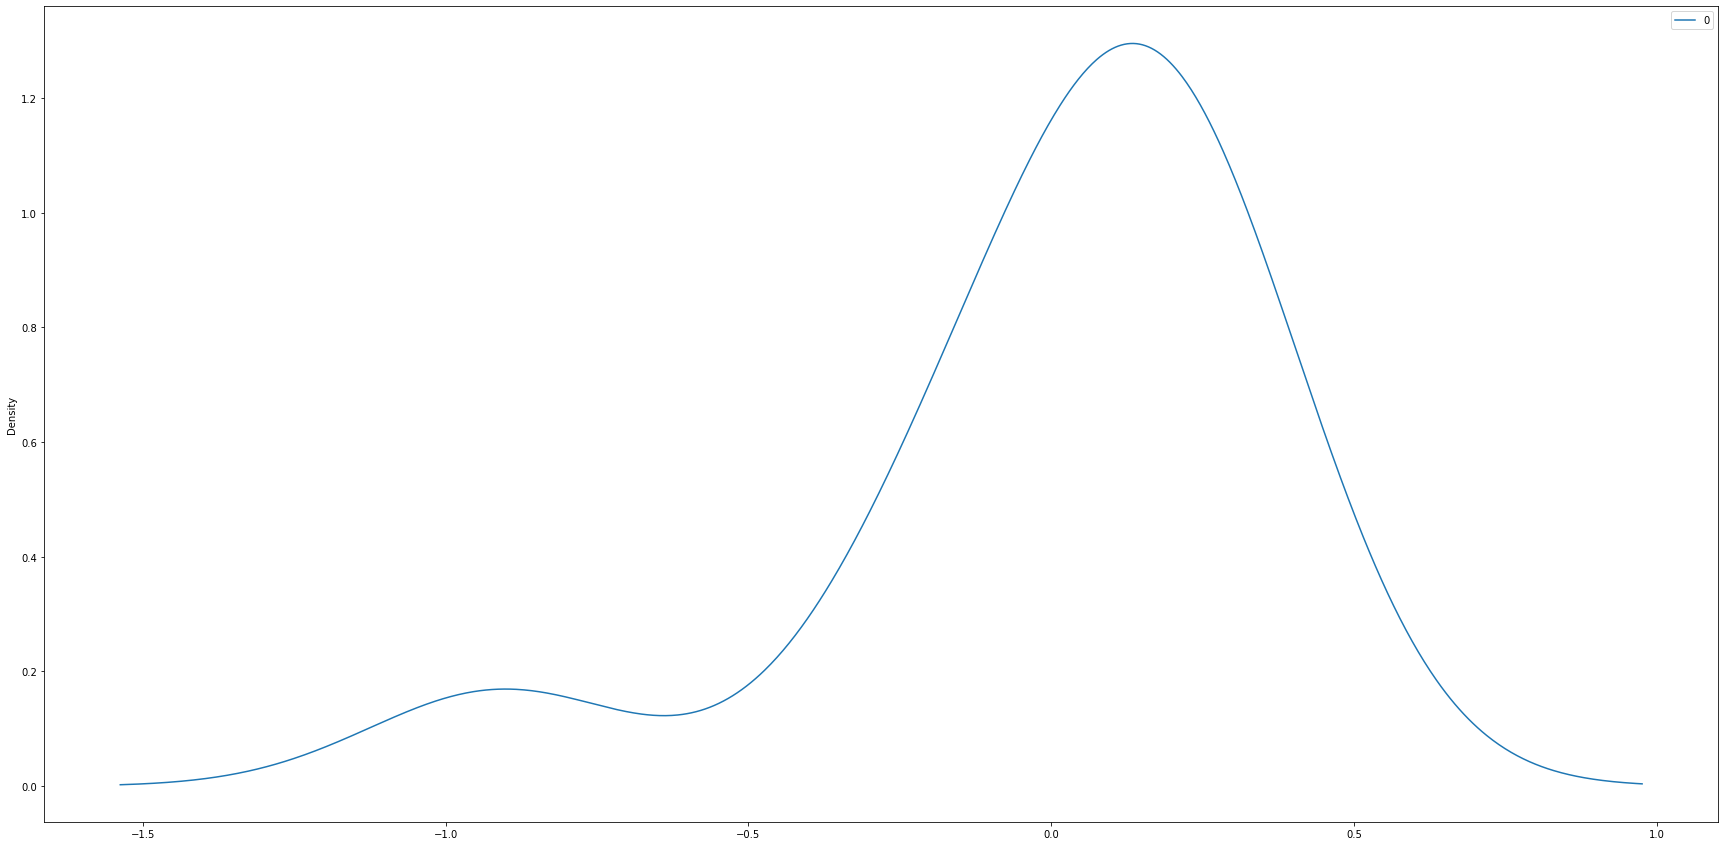

In [56]:
#ARIMA fit instore marketshare
model = ARIMA(fallofinstore, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())

In [57]:
indexdf = pd.date_range(start='2007', periods=12, freq='A') 
indexdf=indexdf.to_period()


X=fallofinstore
X.index = indexdf

In [58]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:132.02933984242964
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:111.45590133580895
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:36.61138119530294
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:26.748408781130593
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:15.053212709866619
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:14.71415433567203
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:13.972679084789812
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:14.885565855989332


In [59]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [60]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 73.38761710703048
ARIMA: (0, 0, 1) 64.85331095207134
ARIMA: (0, 1, 0) 13.45876344461334
ARIMA: (0, 1, 1) 13.498527725019656
ARIMA: (1, 0, 0) 50.91298727499958
ARIMA: (1, 1, 0) 13.225996522575258


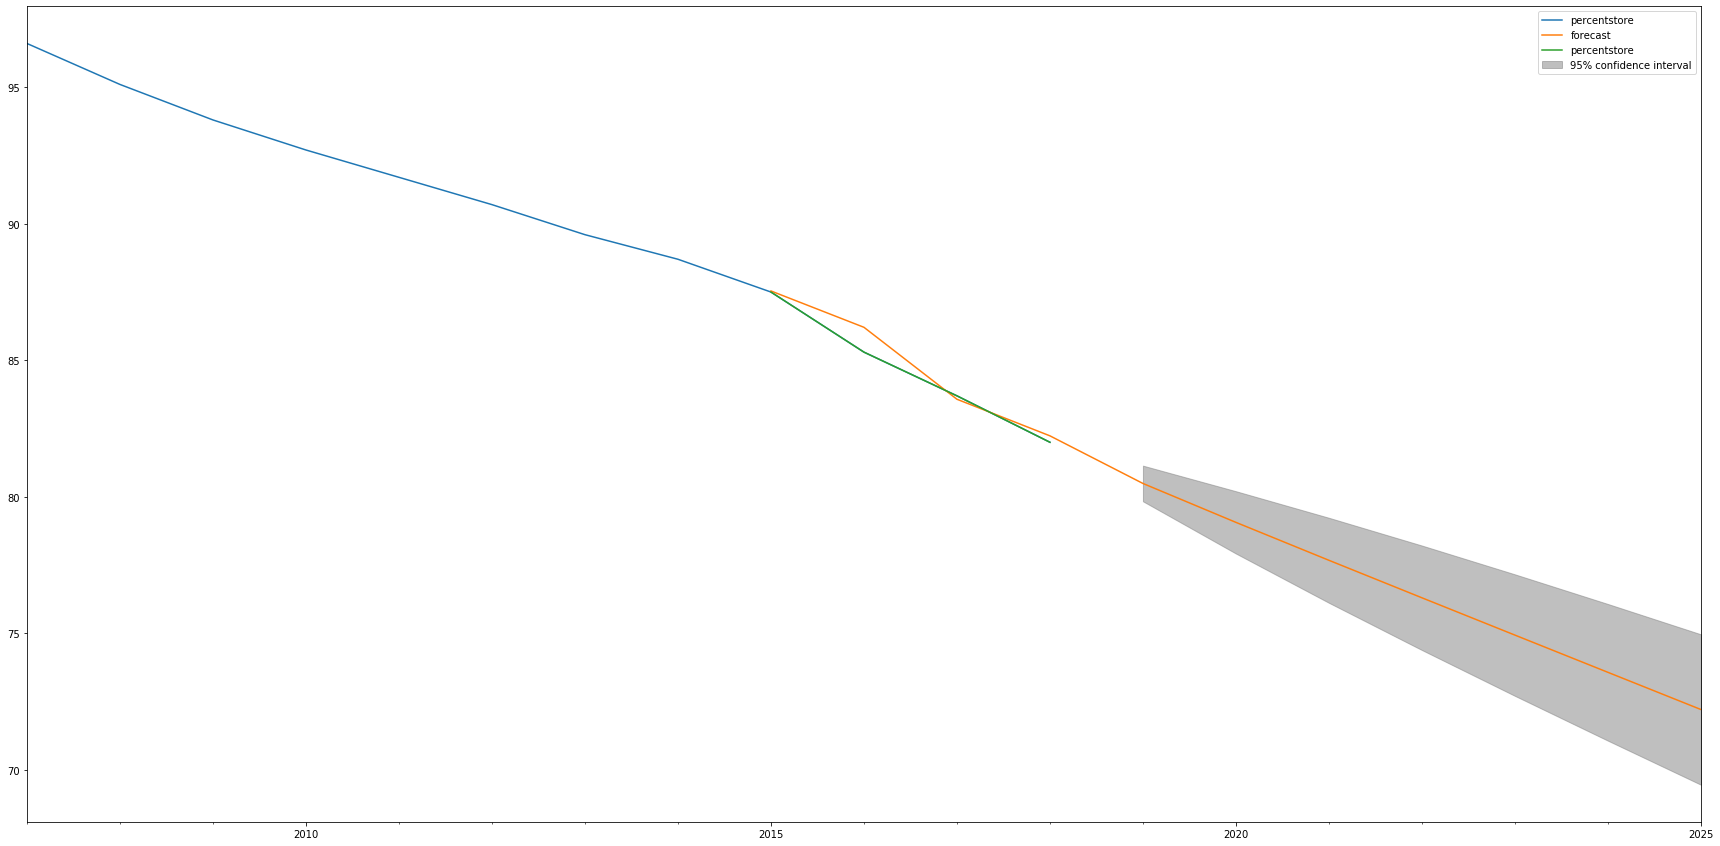

In [61]:
X=fallofinstore
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (1, 1, 0)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2007':].plot(ax=ax)
fig = res.plot_predict('2015', '2025', dynamic=False, ax=ax, plot_insample=True)

plt.show()

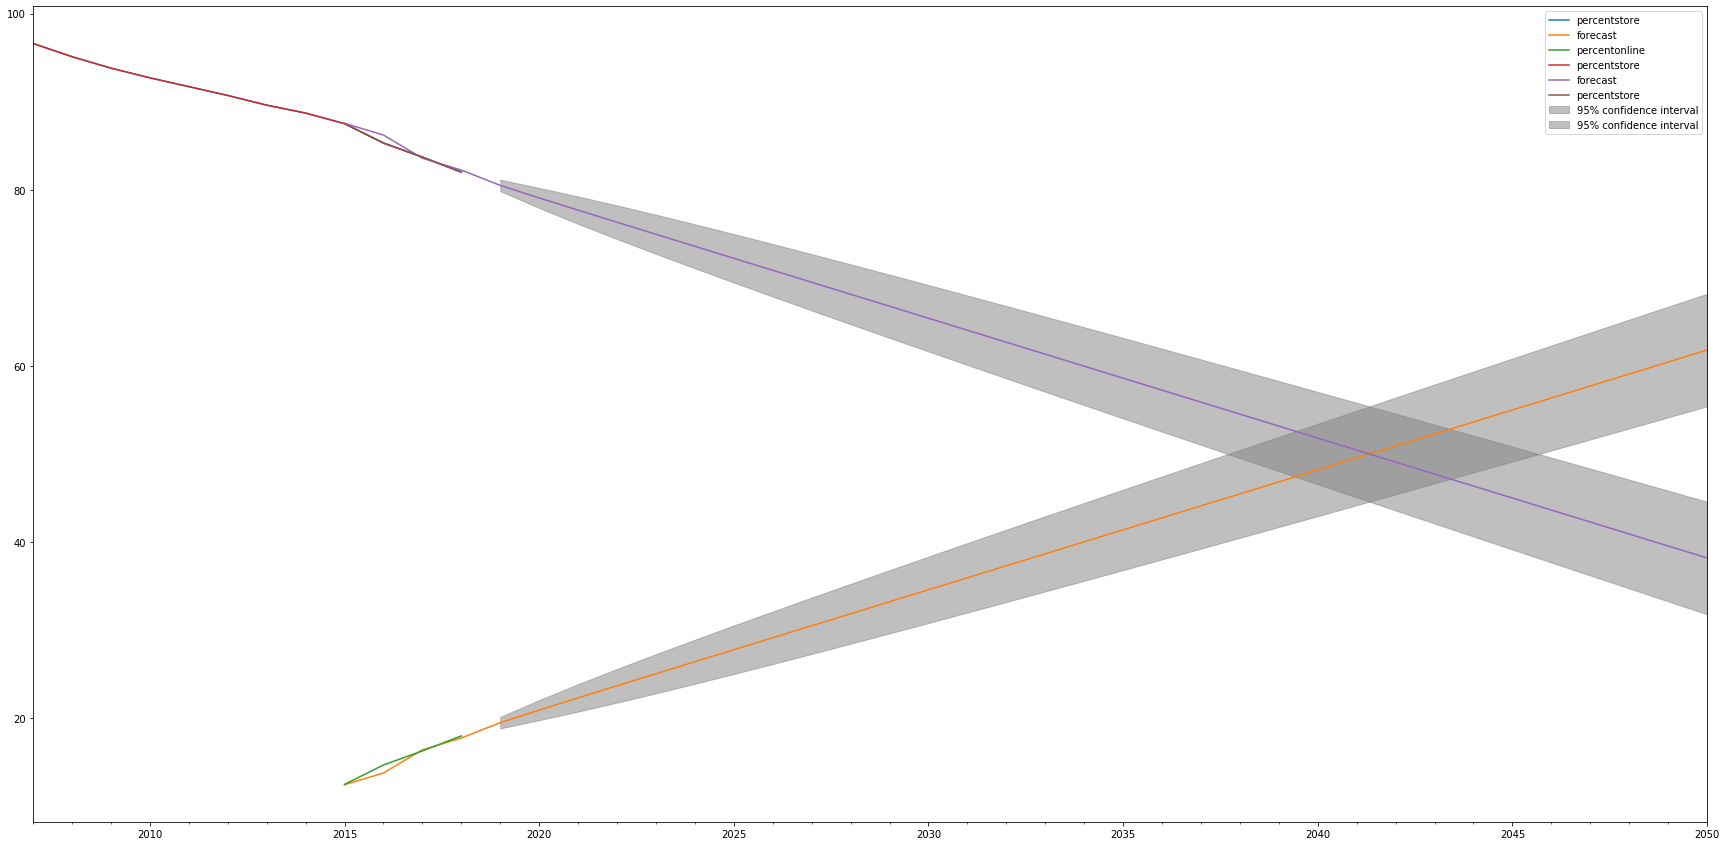

In [62]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()

mod = sm.tsa.ARIMA(riseofonline,order=(1, 1, 0))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2007':].plot(ax=ax)
fig = results.plot_predict('2015', '2050', dynamic=False, ax=ax, plot_insample=True)


mod1 = sm.tsa.ARIMA(fallofinstore,order=(1, 1, 0))
results1 = mod1.fit()
ax = X.loc['2007':].plot(ax=ax)
fig = results1.plot_predict('2015', '2050', dynamic=False, ax=ax, plot_insample=True)



fig.set_size_inches(30,15)

plt.show()



In [63]:
#Logistic Growth
# The diffusion of online shopping in Australia: Comparing the Bass, Logistic and Gompertz growth models


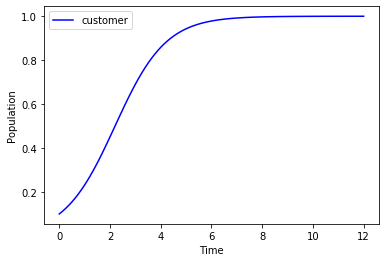

In [64]:
a = 1.0
b = 10.5
c = 0.5
d = 0.5
r=0.1
k=1.0


def dP_dt(P, t):
    return P[0]*(1 - (P[0]/k))

ts = np.linspace(0, 12, 100)
P0 = [0.1]
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]



plt.plot(ts, customer, color='Blue', label="customer")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();


In [65]:
def func(x, b1, b2, b3):
     return (b1/(1+b2*np.exp(-b3*x)))

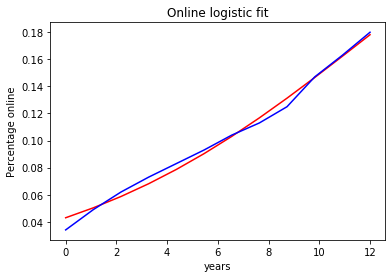

array([0.35038893, 7.15206297, 0.1667854 ])

In [66]:
ydata=onlinedf['percentonline']
xdata = np.linspace(0, 12, 12)
poptlogistic, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptlogistic), 'r-',label='fit: b1=%5.3f, b2=%5.3f, b3=%5.3f' % tuple(poptlogistic))
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('Online logistic fit')
plt.xlabel('years')
plt.ylabel('Percentage online')

plt.show()
poptlogistic


MAPE= 5.0269544868532 %
MSE= 0.00020213208476807173
RMSE= 0.014217316370119634


array([0.04298163, 0.05032674, 0.05868743, 0.06812174, 0.07866367,
       0.090315  , 0.10303768, 0.11674806, 0.13131427, 0.14655784,
       0.16226033, 0.17817458])

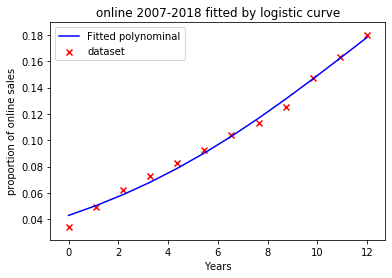

In [67]:
y= func(xdata, *poptlogistic)
x=xdata
y1=onlinedf['percentonline'].values

MAPE=abs((onlinedf['percentonline'] - y)/onlinedf['percentonline']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by logistic curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x,y1, label='dataset', marker ='x', color='r')
plt.legend()
y

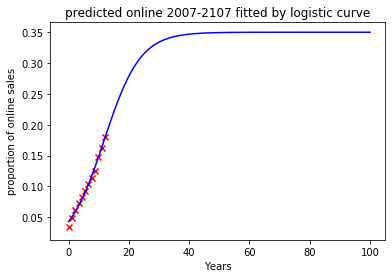

In [68]:
xdata = np.linspace(0, 100, 100)
x1data = np.linspace(0, 12, 12)
y= func(xdata, *poptlogistic)
x=xdata
x1=x1data
y1=onlinedf['percentonline'].values
plt.title('predicted online 2007-2107 fitted by logistic curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')
plt.plot(x,y, label='predicted', color='b')
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

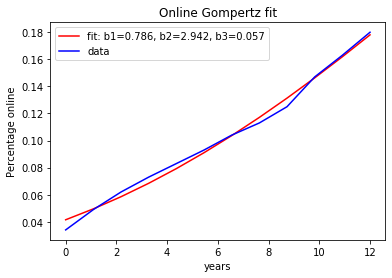

array([0.7864356 , 2.94199841, 0.05695433])

In [69]:
#Gompertz model

def func(x, b1, b2, b3):
     return b1*np.exp(-b2*np.exp(-b3*x))


ydata=onlinedf['percentonline']
xdata = np.linspace(0, 12, 12)
poptGompertz, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptGompertz), 'r-',label='fit: b1=%5.3f, b2=%5.3f, b3=%5.3f' % tuple(poptGompertz))
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('Online Gompertz fit')
plt.xlabel('years')
plt.ylabel('Percentage online')
plt.legend()
plt.show()
poptGompertz






MAPE= 4.40851188051883 %
MSE= 0.0001699554683049092
RMSE= 0.013036696986004898


array([0.04149249, 0.04953809, 0.05851568, 0.06843021, 0.07927359,
       0.09102505, 0.10365181, 0.11711009, 0.13134632, 0.14629857,
       0.16189805, 0.1780707 ])

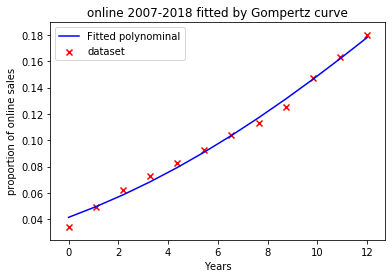

In [70]:
y= func(xdata, *poptGompertz)
x=xdata
y1=onlinedf['percentonline'].values

MAPE=abs((onlinedf['percentonline'] - y)/onlinedf['percentonline']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by Gompertz curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x,y1, label='dataset', marker = 'x', color='r')
plt.legend()
y

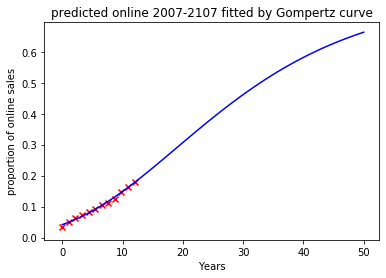

In [71]:
xdata = np.linspace(0, 50, 50)
y= func(xdata, *poptGompertz)
x=xdata
x1data = np.linspace(0, 12, 12)
y= func(xdata, *poptGompertz)
x=xdata
x1=x1data
y1=onlinedf['percentonline'].values

plt.title('predicted online 2007-2107 fitted by Gompertz curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')
plt.plot(x,y, label='predicted', color='b')
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

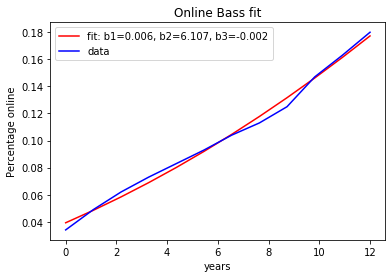

array([ 6.43082341e-03,  6.10726226e+00, -1.70974444e-03])

In [72]:
#Bass Model
def func(x,p, m, q):
     return p*m + (p-q)*x - (q/m)*x**2
    


ydata=onlinedf['percentonline']
xdata = np.linspace(0, 12, 12)
poptbass, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptbass), 'r-',label='fit: b1=%5.3f, b2=%5.3f, b3=%5.3f' % tuple(poptbass))
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('Online Bass fit')
plt.xlabel('years')
plt.ylabel('Percentage online')
plt.legend()
plt.show()
poptbass


MAPE= 3.804186329186204 %
MSE= 0.00014497302697302674
RMSE= 0.012040474532717834


array([0.03927473, 0.04848851, 0.05836863, 0.06891508, 0.08012787,
       0.09200699, 0.10455245, 0.11776424, 0.13164236, 0.14618681,
       0.1613976 , 0.17727473])

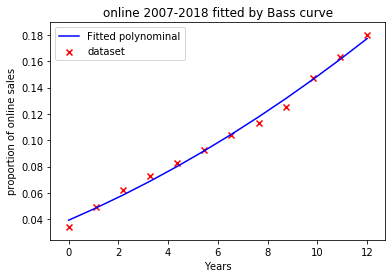

In [73]:
y= func(xdata, *poptbass)
x=xdata
y1=onlinedf['percentonline'].values

MAPE=abs((onlinedf['percentonline'] - y)/onlinedf['percentonline']).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'] - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by Bass curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x,y1, label='dataset', marker = 'x', color='r')
plt.legend()
y

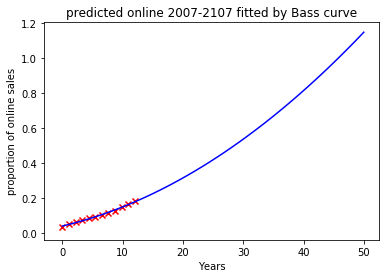

In [74]:
xdata = np.linspace(0, 50, 50)
y= func(xdata, *poptbass)
x=xdata
x1data = np.linspace(0, 12, 12)
y= func(xdata, *poptbass)
x=xdata
x1=x1data
y1=onlinedf['percentonline'].values

plt.title('predicted online 2007-2107 fitted by Bass curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')
plt.plot(x,y, label='predicted', color='b')
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

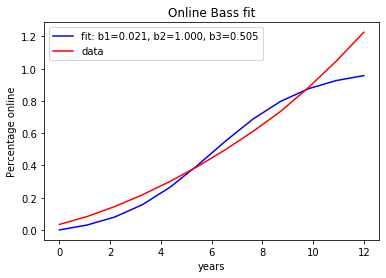

array([0.02125166, 1.        , 0.50503165])

In [75]:
#Bass model using  the Srinivasan-Mason form


def func(x,p,m,q):
    return (1-np.exp(-1*(p+q)*x))/ (1+ (q*np.exp(-1*(p+q)*x))/p)

ydata=onlinedf['percentonline'].cumsum().values
xdata = np.linspace(0, 12, 12)
poptbass, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptbass), 'b-',label='fit: b1=%5.3f, b2=%5.3f, b3=%5.3f' % tuple(poptbass))
plt.plot(xdata, ydata, 'r-', label='data')
plt.title('Online Bass fit')
plt.xlabel('years')
plt.ylabel('Percentage online')
plt.legend()
plt.show()
poptbass

MAPE= 26.34663740680866 %
MSE= 0.11256434745833392
RMSE= 0.33550610643970985


array([0.        , 0.03036738, 0.07997487, 0.15659073, 0.2652352 ,
       0.40200934, 0.55055821, 0.6881211 , 0.79793531, 0.87566712,
       0.92612619, 0.95706506])

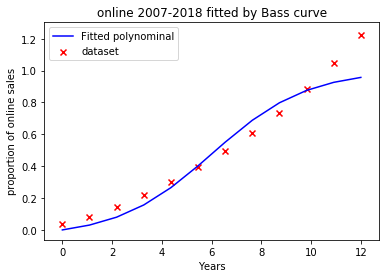

In [76]:
y= func(xdata, *poptbass)
x=xdata
y1data=onlinedf['percentonline'].cumsum().values


MAPE=abs((onlinedf['percentonline'].cumsum().values - y)/onlinedf['percentonline'].cumsum().values).sum()/12
print('MAPE=', MAPE*100, '%')
MSE=((onlinedf['percentonline'].cumsum().values - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by Bass curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x,y1data, label='dataset', marker = 'x', color='r')
plt.legend()
y

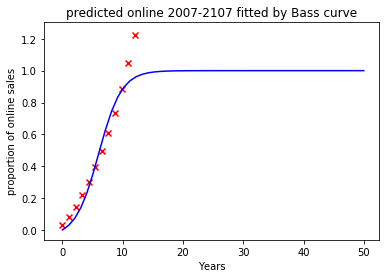

In [77]:
xdata = np.linspace(0, 50, 50)
y= func(xdata, *poptbass)
x=xdata
x1data = np.linspace(0, 12, 12)
y= func(xdata, *poptbass)
x=xdata
x1=x1data
y1=onlinedf['percentonline'].cumsum().values

plt.title('predicted online 2007-2107 fitted by Bass curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')
plt.plot(x,y, label='predicted', color='b')
plt.scatter(x1,y1, label='actual', marker ='x', color='r')

In [78]:
#Monthly data

In [79]:
monthlydf=pd.read_csv(r'D:\neatwriteup\data\online\monthly.csv')
monthlydf.columns = monthlydf.columns.values.astype(str)

monthlydf.head()

,time,online
0,01/01/2013,566.9
1,01/02/2013,554.2
2,01/03/2013,592.8
3,01/04/2013,575.2
4,01/05/2013,584.0


In [80]:
monthlydf['time'] = pd.to_datetime(monthlydf['time']).dt.strftime('%d-%m%-Y%')
monthlydf.head()


,time,online
0,2013-01-01 00:00:00,566.9
1,2013-01-02 00:00:00,554.2
2,2013-01-03 00:00:00,592.8
3,2013-01-04 00:00:00,575.2
4,2013-01-05 00:00:00,584.0


In [81]:
#monthlydf=monthlydf.set_index(['time'], inplace=True)
#monthlydf

In [82]:
indexdf1 = pd.date_range(start='2013-01-01', periods=77, freq='M') 
indexdf1=indexdf1.to_period()

In [83]:
monthlydf.head()

,time,online
0,2013-01-01 00:00:00,566.9
1,2013-01-02 00:00:00,554.2
2,2013-01-03 00:00:00,592.8
3,2013-01-04 00:00:00,575.2
4,2013-01-05 00:00:00,584.0


In [84]:
monthlydf['period']=indexdf1

In [85]:
monthlydf.head()

,time,online,period
0,2013-01-01 00:00:00,566.9,2013-01
1,2013-01-02 00:00:00,554.2,2013-02
2,2013-01-03 00:00:00,592.8,2013-03
3,2013-01-04 00:00:00,575.2,2013-04
4,2013-01-05 00:00:00,584.0,2013-05


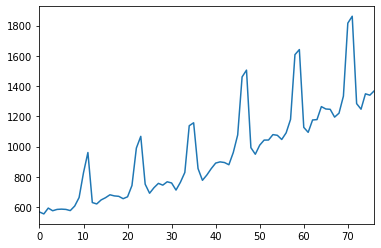

In [86]:
monthlydf['online'].plot()

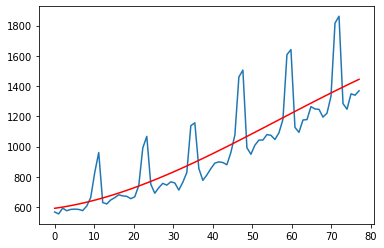

In [99]:
from scipy.signal import savgol_filter
#yhat = savgol_filter(y, 51, 3)

y=monthlydf['online'].values
yhat = savgol_filter(y, 77, 3) # window size 51, polynomial order 3
x = np.linspace(0, 77, 77)
plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [100]:
#def func(x, b1, b2, b3):
 #    return (b1/(1+b2*np.exp(-b3*x)))

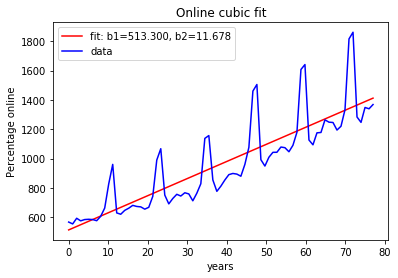

array([513.30049863,  11.67801032])

In [101]:
#toy model

#def func(x, a, b,c ):
    # return a+b*x +c*x**2
def func(x,a,b):
    return a+b*x 

ydata=monthlydf['online'].values
xdata = np.linspace(0, 77, 77)
poptcubic, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *poptcubic), 'r-',label='fit: b1=%5.3f, b2=%5.3f' % tuple(poptcubic))
plt.plot(xdata, ydata, 'b-', label='data')
plt.title('Online cubic fit')
plt.xlabel('years')
plt.ylabel('Percentage online')
plt.legend()
plt.show()
poptcubic

MAPE= 2.7636790185282236 %
MSE= 57501.720836742425
RMSE= 239.79516433144022


array([ 513.30049863,  525.13216698,  536.96383534,  548.79550369,
        560.62717204,  572.4588404 ,  584.29050875,  596.12217711,
        607.95384546,  619.78551382,  631.61718217,  643.44885053,
        655.28051888,  667.11218724,  678.94385559,  690.77552395,
        702.6071923 ,  714.43886065,  726.27052901,  738.10219736,
        749.93386572,  761.76553407,  773.59720243,  785.42887078,
        797.26053914,  809.09220749,  820.92387585,  832.7555442 ,
        844.58721256,  856.41888091,  868.25054927,  880.08221762,
        891.91388597,  903.74555433,  915.57722268,  927.40889104,
        939.24055939,  951.07222775,  962.9038961 ,  974.73556446,
        986.56723281,  998.39890117, 1010.23056952, 1022.06223788,
       1033.89390623, 1045.72557458, 1057.55724294, 1069.38891129,
       1081.22057965, 1093.052248  , 1104.88391636, 1116.71558471,
       1128.54725307, 1140.37892142, 1152.21058978, 1164.04225813,
       1175.87392649, 1187.70559484, 1199.5372632 , 1211.36893

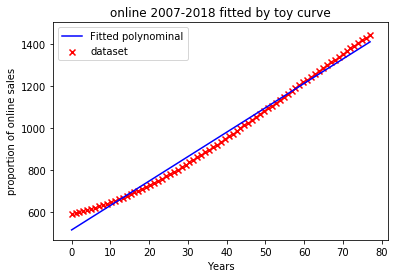

In [102]:
y= func(xdata, *poptcubic)
x=xdata
#y1=monthlydf['online'].values
y1=yhat
MAPE=abs((yhat - y)/yhat).sum()/77
print('MAPE=', MAPE*100, '%')
MSE=((yhat - y)**2).sum()
print('MSE=',MSE)
RMSE=math.sqrt(MSE)
print('RMSE=', RMSE)

plt.title('online 2007-2018 fitted by toy curve')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')

#onlinedf['percentonline'].scatter(marker='.', color='r')
plt.plot(x,y, label='Fitted polynominal', color='b')
plt.scatter(x,y1, label='dataset', marker = 'x', color='r')
plt.legend()
y

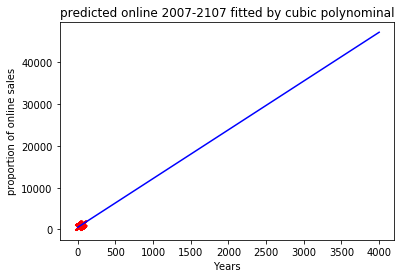

In [103]:
xdata = np.linspace(0, 4000, 4000)
y= func(xdata, *poptcubic)
x=xdata
x1data = np.linspace(0, 77, 77)
y= func(xdata, *poptcubic)
x=xdata
x1=x1data
y1=yhat

plt.title('predicted online 2007-2107 fitted by cubic polynominal')
plt.xlabel('Years')
plt.ylabel('proportion of online sales')
plt.plot(x,y, label='predicted', color='b')
plt.scatter(x1,y1, label='actual', marker ='x', color='r')